Importamos las librerias base que se utilizarán en el proyecto:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re

Se habilita el acceso a Google Drive:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import nltk
from nltk.corpus import stopwords

# Get spanish stopwords from NLTK library and store them in stop_words
nltk.download('stopwords')
stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Function to count number of upper case occurrences in a string
def n_upper_chars(text_string):
    return sum(map(str.isupper, text_string))

In [5]:
def get_vocal_ratio(word):
  ratio = len(re.findall(r'[aeiou]', word))/len(word)

In [6]:
def find_pattern_positions(str_pattern, word):
  iter = re.finditer(str_pattern, word)
  positions = [m.start(0) + 1 for m in iter]
  return positions, [len(word)]*len(positions)

In [7]:
def get_wordlist_from_txt_file(file_address):
  word_list = []
  with open(file_address, "r") as txt_file:  
    for line in txt_file:
      # line_filtered = re.sub(r"\n|\t|\u200b|-|_|\.", "", line) # No longer needed
      # line_filtered = re.sub(r"\(|\)|\[|\]|/", " ", line_filtered) # No longer needed
      line_filtered = re.sub(r'[á]', 'a', line)
      line_filtered = re.sub(r'[é]', 'e', line_filtered)
      line_filtered = re.sub(r'[í]', 'i', line_filtered)
      line_filtered = re.sub(r'[ó]', 'o', line_filtered)
      line_filtered = re.sub(r'[ú]', 'u', line_filtered)
      line_filtered = re.sub(r'[Á]', 'A', line_filtered)
      line_filtered = re.sub(r'[É]', 'E', line_filtered)
      line_filtered = re.sub(r'[Í]', 'I', line_filtered)
      line_filtered = re.sub(r'[Ó]', 'O', line_filtered)
      line_filtered = re.sub(r'[Ú]', 'U', line_filtered)
      line_filtered = re.sub("[^A-ZÑa-zñ]+", " ", line_filtered)
      line_word_list = re.findall(r"\b[A-ZÑa-zñ]+\b", line_filtered)
      line_word_list = [word.lower() for word in line_word_list if word not in stop_words and len(word) > 3 and n_upper_chars(word) <= 1]
      word_list.extend(line_word_list)
    
  return word_list

Definimos una lista con los nombres de todas las fuentes de datos a procesar:

In [8]:
files_address_base = "/content/drive/MyDrive/Colab Notebooks/data/raw_texts/"
source_files_addresses = [
  files_address_base + "_C3_81frica.txt",
  files_address_base + "Aeropuerto.txt",
  files_address_base + "Agricultura.txt",
  files_address_base + "Alan_Turing.txt",
  files_address_base + "Antiguo_Egipto.txt",
  files_address_base + "Arte.txt",
  files_address_base + "Asia.txt",
  files_address_base + "Babilonia_(ciudad).txt",
  files_address_base + "Biblia.txt",
  files_address_base + "Biodiversidad.txt",
  files_address_base + "Capitalismo.txt",
  files_address_base + "Ciencia.txt",
  files_address_base + "Colombia.txt",
  files_address_base + "Consumo.txt",
  files_address_base + "Cristianismo.txt",
  files_address_base + "Cristo.txt",
  files_address_base + "Cultura.txt",
  files_address_base + "Democracia.txt",
  files_address_base + "Diccionario.txt",
  files_address_base + "Divina_comedia.txt",
  files_address_base + "Ecologismo.txt",
  files_address_base + "Energ_C3_ADa_nuclear.txt",
  files_address_base + "Enrique_VIII_de_Inglaterra.txt",
  files_address_base + "Escritura.txt",
  files_address_base + "Est_C3_A9tica.txt",
  files_address_base + "Estado.txt",
  files_address_base + "Estados_Unidos.txt",
  files_address_base + "Europa.txt",
  files_address_base + "Filosof_C3_ADa.txt",
  files_address_base + "Finanzas.txt",
  files_address_base + "Fruta.txt",
  files_address_base + "Gabriel_Garc_C3_ADa_M_C3_A1rquez.txt",
  files_address_base + "Gastronom_C3_ADa_de_M_C3_A9xico.txt",
  files_address_base + "George_Patton.txt",
  files_address_base + "Grecia.txt",
  files_address_base + "Guerra_Fr_C3_ADa.txt",
  files_address_base + "Henry_Ford.txt",
  files_address_base + "Holocausto.txt",
  files_address_base + "Homo_sapiens.txt",
  files_address_base + "Inteligencia_artificial.txt",
  files_address_base + "Italia.txt",
  files_address_base + "Jorge_Isaacs.txt",
  files_address_base + "Juda_C3_ADsmo.txt",
  files_address_base + "Juglar.txt",
  files_address_base + "Julio_Garavito.txt",
  files_address_base + "Liberalismo.txt",
  files_address_base + "Libro.txt",
  files_address_base + "Ludwig_van_Beethoven.txt",
  files_address_base + "Nevado_del_Ruiz.txt",
  files_address_base + "Nikola_Tesla.txt",
  files_address_base + "Odisea.txt",
  files_address_base + "Organizaci_C3_B3n_de_las_Naciones_Unidas.txt",
  files_address_base + "Per_C3_ADodo_helen_C3_ADstico.txt",
  files_address_base + "Pizza.txt",
  files_address_base + "Pueblos_germ_C3_A1nicos.txt",
  files_address_base + "Real_Academia_Espa_C3_B1ola.txt",
  files_address_base + "Reino_Unido.txt",
  files_address_base + "Revoluci_C3_B3n_Industrial.txt",
  files_address_base + "Rueda.txt",
  files_address_base + "Salsa_(g_C3_A9nero_musical).txt",
  files_address_base + "Saxof_C3_B3n.txt",
  files_address_base + "Segunda_Guerra_Mundial.txt",
  files_address_base + "Sublime.txt",
  files_address_base + "Thomas_Alva_Edison.txt",
  files_address_base + "Valle.txt"
]

# print(source_files_addresses)

In [9]:
raw_word_list = []
for address in source_files_addresses:
  raw_word_list.extend(get_wordlist_from_txt_file(address))

word_list = set(raw_word_list)
# print(word_list)

In [10]:
word_list_df = pd.DataFrame({ 'words' : list(word_list) })

In [11]:
word_list_df['word_freq'] = [raw_word_list.count(word) for word in word_list_df['words']]

In [12]:
word_list_df['word_length'] = [len(word) for word in word_list_df['words']]
word_list_df['vocals_count'] = [len(re.findall(r'[aeiou]', word)) for word in word_list_df['words']]

In [14]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [27]:
def present_central_tendencies(df, variable, variable_name, unit):
  mean = df[variable].mean()
  median = df[variable].median()
  mode = df[variable].mode()[0]

  plt.figure(figsize=(12,6))
  plt.title("Histograma de " + variable_name)
  plt.xlabel(variable_name)
  plt.ylabel("Frecuencia de " + variable_name)
  graph = sns.histplot(data = df, x = variable, discrete = True)
  show_values_on_bars(graph, "v")
  plt.axvline(x = mean, color = "black", label = "Media")
  plt.axvline(x = median, color = "blue", label = "Mediana")
  plt.axvline(x = mode, color = "green", label = "Moda")
  plt.legend()
  plt.show()

  print("La media de " + variable_name + f" es: {mean} " + unit)
  print("La mediana de " + variable_name + f" es: {median} " + unit)
  print("La moda de " + variable_name + f" es: {mode} " + unit)


In [30]:
def present_position_stats(df, variable, variable_name, unit):
  q1 = np.percentile(df[variable], 25)
  q2 = np.percentile(df[variable], 50)
  q3 = np.percentile(df[variable], 75)

  plt.figure(figsize=(12,6))
  plt.title("Diagrama de cajas de " + variable_name)
  plt.xlabel(variable_name)
  sns.boxplot(data = df, x = variable)
  plt.axvline(x = q1, color = "blue", label = "Cuartil 1 (25%)")
  plt.axvline(x = q2, color = "black", label = "Cuartil 2 (50%)")
  plt.axvline(x = q3, color = "green", label = "Cuartil 3 (75%)")
  plt.legend()
  plt.show()

  print("El cuartil 1 de " + variable_name + f" es: {q1} " + unit)
  print("El cuartil 2 de " + variable_name + f" es: {q2} " + unit)
  print("El cuartil 3 de " + variable_name + f" es: {q3} " + unit)

In [34]:
def present_dispersion_stats(df, variable, variable_name, unit):
  max = np.max(df[variable])
  min = np.min(df[variable])
  var = np.var(df[variable])
  std = np.std(df[variable])

  print("El rango de " + variable_name + f" es de: {max-min} [{min} a {max}] " + unit)
  print("La varianza de " + variable_name + f" es: {var} " + unit + " cuadrados/cuadradas")
  print("La desviación estándar de " + variable_name + f" es: {std} " + unit)

In [102]:
def present_position_by_length(df, variable_name):
  g = sns.displot(df, y="word_lengths", x="positions", binwidth=(1, .5), cbar=True, aspect=12/6)
  g.set_axis_labels(variable_name, "Longitudes de palabras")

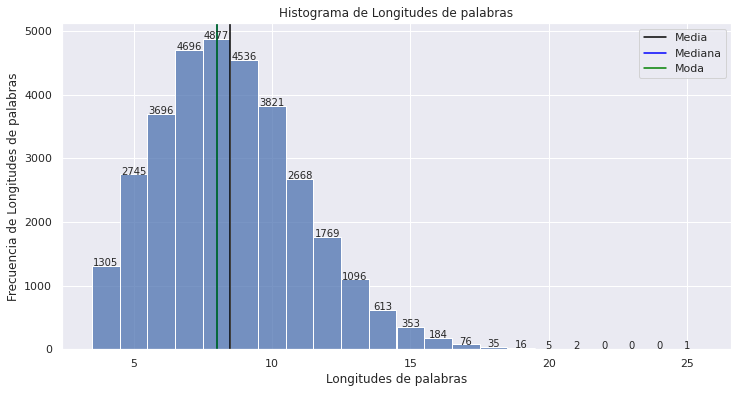

La media de Longitudes de palabras es: 8.496368560349604 caracteres
La mediana de Longitudes de palabras es: 8.0 caracteres
La moda de Longitudes de palabras es: 8 caracteres


In [28]:
present_central_tendencies(word_list_df, 'word_length', 'Longitudes de palabras', 'caracteres')

In [19]:
word_lengths_q1 = np.percentile(word_list_df['word_length'], 25)
word_lengths_q2 = np.percentile(word_list_df['word_length'], 50)
word_lengths_q3 = np.percentile(word_list_df['word_length'], 75)
word_lengths_p90 = np.percentile(word_list_df['word_length'], 90)

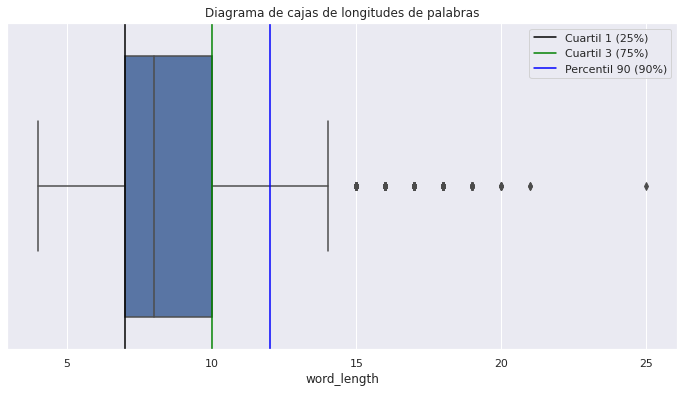

El cuartil 1 de la longitud de las palabras es: 7.0 caracteres
El cuartil 2 de la longitud de las palabras es: 8.0 caracteres
El cuartil 3 de la longitud de las palabras es: 10.0 caracteres
El percentil 90 de la longitud de las palabras es: 12.0 caracteres


In [22]:
plt.figure(figsize=(12,6))
plt.title("Diagrama de cajas de longitudes de palabras")
plt.xlabel("Longitudes de palabras")
sns.boxplot(data = word_list_df, x = 'word_length')
plt.axvline(x = word_lengths_q1, color = "black", label = "Cuartil 1 (25%)")
plt.axvline(x = word_lengths_q3, color = "green", label = "Cuartil 3 (75%)")
plt.axvline(x = word_lengths_p90, color = "blue", label = "Percentil 90 (90%)")
plt.legend()
plt.show()

print(f"El cuartil 1 de la longitud de las palabras es: {word_lengths_q1} caracteres")
print(f"El cuartil 2 de la longitud de las palabras es: {word_lengths_q2} caracteres")
print(f"El cuartil 3 de la longitud de las palabras es: {word_lengths_q3} caracteres")
print(f"El percentil 90 de la longitud de las palabras es: {word_lengths_p90} caracteres")

In [35]:
present_dispersion_stats(word_list_df, 'word_length', 'Longitudes de palabras', 'caracteres')

El rango de Longitudes de palabras es de: 21 [4 a 25] caracteres
La varianza de Longitudes de palabras es: 6.791255970028412 caracteres cuadrados/cuadradas
La desviación estándar de Longitudes de palabras es: 2.6060038315452285 caracteres


In [25]:
a_positions, b_positions, c_positions, d_positions, e_positions, f_positions, g_positions, h_positions, i_positions, j_positions, k_positions, l_positions, m_positions, n_positions, ñ_positions, o_positions, p_positions, q_positions, r_positions, s_positions, t_positions, u_positions, v_positions, w_positions, x_positions, y_positions, z_positions = ({'positions' : [], 'word_lengths': []} for i in range(27))
for word in word_list_df['words']:
  
  positions, lengths = find_pattern_positions(r'a', word)
  a_positions['positions'].extend(positions)
  a_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'b', word)
  b_positions['positions'].extend(positions)
  b_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'c', word)
  c_positions['positions'].extend(positions)
  c_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'd', word)
  d_positions['positions'].extend(positions)
  d_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'e', word)
  e_positions['positions'].extend(positions)
  e_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'f', word)
  f_positions['positions'].extend(positions)
  f_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'g', word)
  g_positions['positions'].extend(positions)
  g_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'h', word)
  h_positions['positions'].extend(positions)
  h_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'i', word)
  i_positions['positions'].extend(positions)
  i_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'j', word)
  j_positions['positions'].extend(positions)
  j_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'k', word)
  k_positions['positions'].extend(positions)
  k_positions['word_lengths'].extend(lengths)
  
  positions, lengths = find_pattern_positions(r'l', word)
  l_positions['positions'].extend(positions)
  l_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'm', word)
  m_positions['positions'].extend(positions)
  m_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'n', word)
  n_positions['positions'].extend(positions)
  n_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'ñ', word)
  ñ_positions['positions'].extend(positions)
  ñ_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'o', word)
  o_positions['positions'].extend(positions)
  o_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'p', word)
  p_positions['positions'].extend(positions)
  p_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'q', word)
  q_positions['positions'].extend(positions)
  q_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'r', word)
  r_positions['positions'].extend(positions)
  r_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r's', word)
  s_positions['positions'].extend(positions)
  s_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r't', word)
  t_positions['positions'].extend(positions)
  t_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'u', word)
  u_positions['positions'].extend(positions)
  u_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'v', word)
  v_positions['positions'].extend(positions)
  v_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'w', word)
  w_positions['positions'].extend(positions)
  w_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'x', word)
  x_positions['positions'].extend(positions)
  x_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'y', word)
  y_positions['positions'].extend(positions)
  y_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'z', word)
  z_positions['positions'].extend(positions)
  z_positions['word_lengths'].extend(lengths)

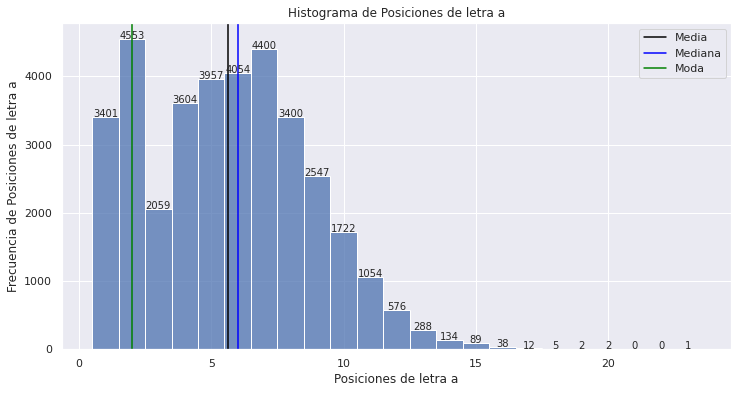

La media de Posiciones de letra a es: 5.621928798261742 posición
La mediana de Posiciones de letra a es: 6.0 posición
La moda de Posiciones de letra a es: 2 posición


El rango de Posiciones de letra a es de: 22 [1 a 23] posiciones
La varianza de Posiciones de letra a es: 9.529634454565466 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra a es: 3.0870106016282914 posiciones




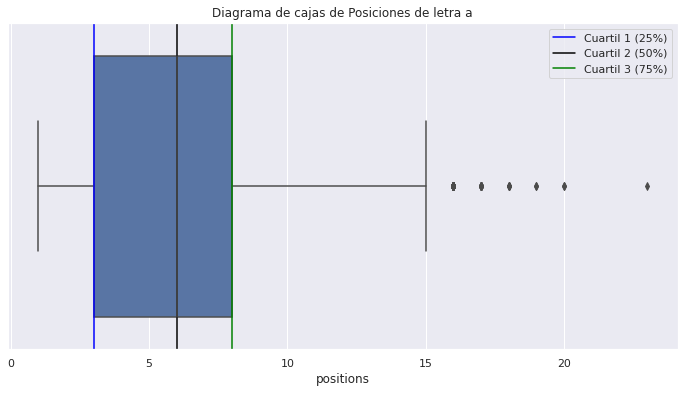

El cuartil 1 de Posiciones de letra a es: 3.0 posición
El cuartil 2 de Posiciones de letra a es: 6.0 posición
El cuartil 3 de Posiciones de letra a es: 8.0 posición




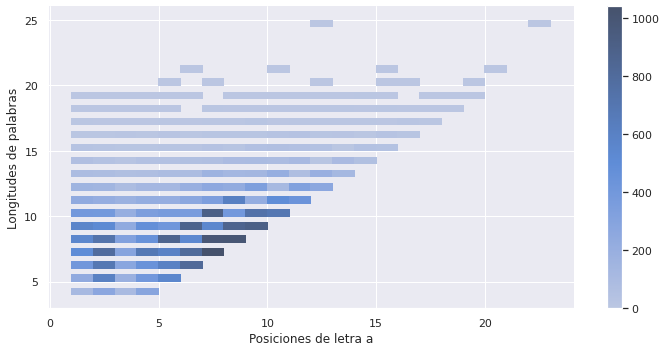

In [103]:
present_central_tendencies(pd.DataFrame(a_positions), 'positions', 'Posiciones de letra a', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(a_positions), 'positions', 'Posiciones de letra a', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(a_positions), 'positions', 'Posiciones de letra a', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(a_positions), 'Posiciones de letra a')

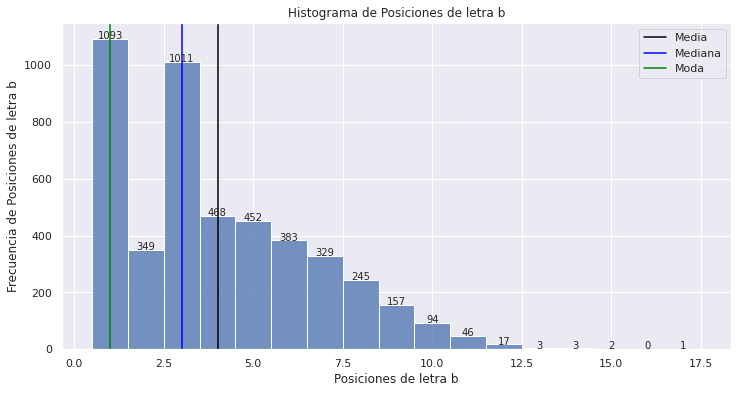

La media de Posiciones de letra b es: 4.020631850419084 posición
La mediana de Posiciones de letra b es: 3.0 posición
La moda de Posiciones de letra b es: 1 posición


El rango de Posiciones de letra b es de: 16 [1 a 17] posiciones
La varianza de Posiciones de letra b es: 7.030307187268477 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra b es: 2.651472645016063 posiciones




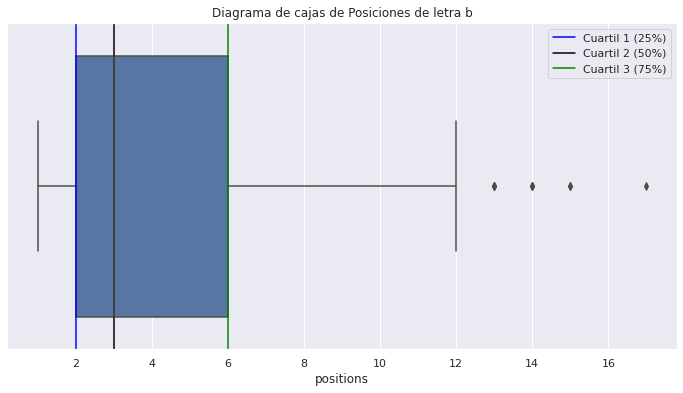

El cuartil 1 de Posiciones de letra b es: 2.0 posición
El cuartil 2 de Posiciones de letra b es: 3.0 posición
El cuartil 3 de Posiciones de letra b es: 6.0 posición




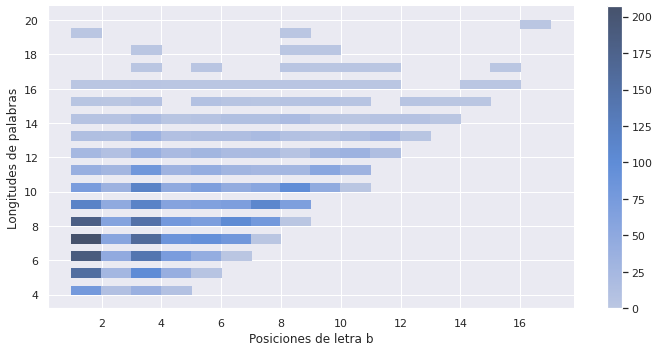

In [104]:
present_central_tendencies(pd.DataFrame(b_positions), 'positions', 'Posiciones de letra b', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(b_positions), 'positions', 'Posiciones de letra b', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(b_positions), 'positions', 'Posiciones de letra b', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(b_positions), 'Posiciones de letra b')

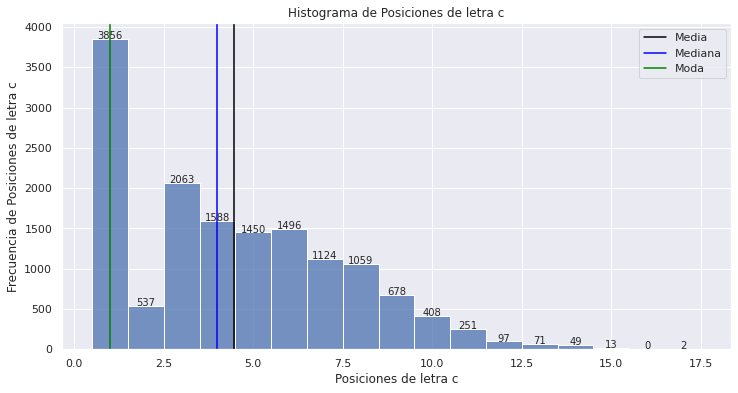

La media de Posiciones de letra c es: 4.475783475783476 posición
La mediana de Posiciones de letra c es: 4.0 posición
La moda de Posiciones de letra c es: 1 posición


El rango de Posiciones de letra c es de: 16 [1 a 17] posiciones
La varianza de Posiciones de letra c es: 9.006841317382868 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra c es: 3.0011400029626856 posiciones




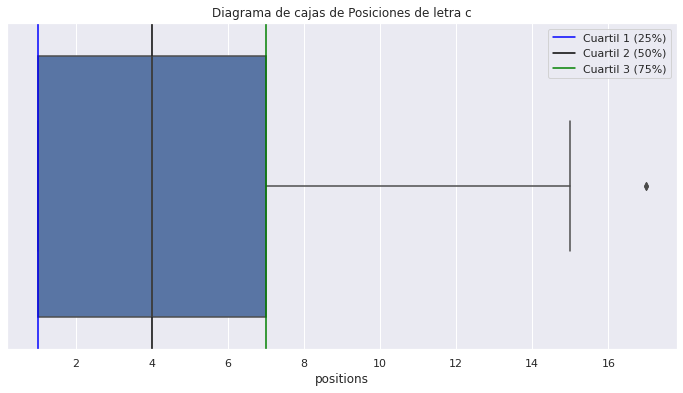

El cuartil 1 de Posiciones de letra c es: 1.0 posición
El cuartil 2 de Posiciones de letra c es: 4.0 posición
El cuartil 3 de Posiciones de letra c es: 7.0 posición




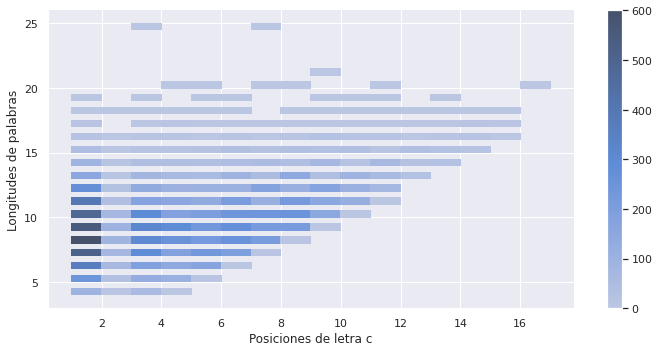

In [105]:
present_central_tendencies(pd.DataFrame(c_positions), 'positions', 'Posiciones de letra c', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(c_positions), 'positions', 'Posiciones de letra c', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(c_positions), 'positions', 'Posiciones de letra c', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(c_positions), 'Posiciones de letra c')

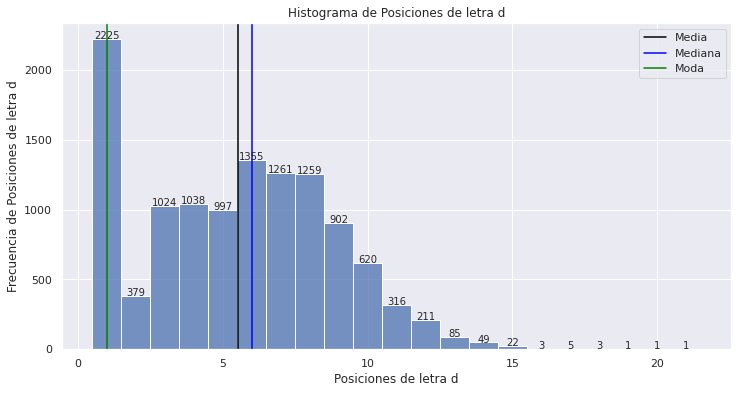

La media de Posiciones de letra d es: 5.521391511439993 posición
La mediana de Posiciones de letra d es: 6.0 posición
La moda de Posiciones de letra d es: 1 posición


El rango de Posiciones de letra d es de: 20 [1 a 21] posiciones
La varianza de Posiciones de letra d es: 10.564078424333045 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra d es: 3.2502428254413616 posiciones




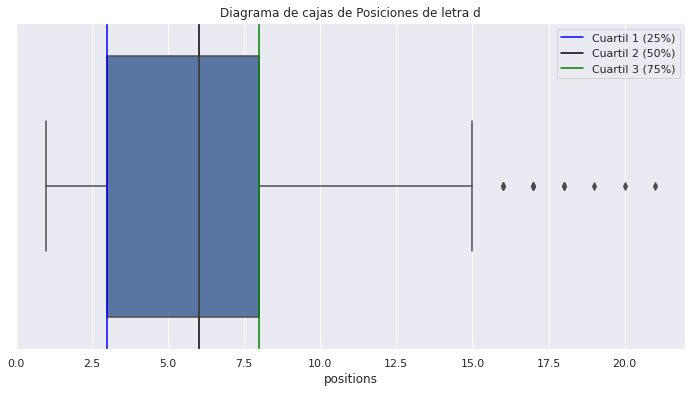

El cuartil 1 de Posiciones de letra d es: 3.0 posición
El cuartil 2 de Posiciones de letra d es: 6.0 posición
El cuartil 3 de Posiciones de letra d es: 8.0 posición




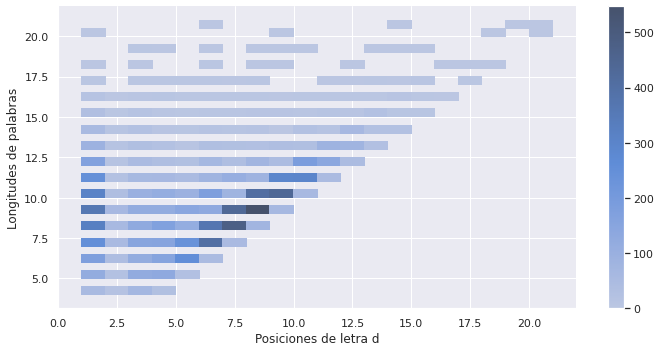

In [106]:
present_central_tendencies(pd.DataFrame(d_positions), 'positions', 'Posiciones de letra d', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(d_positions), 'positions', 'Posiciones de letra d', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(d_positions), 'positions', 'Posiciones de letra d', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(d_positions), 'Posiciones de letra d')

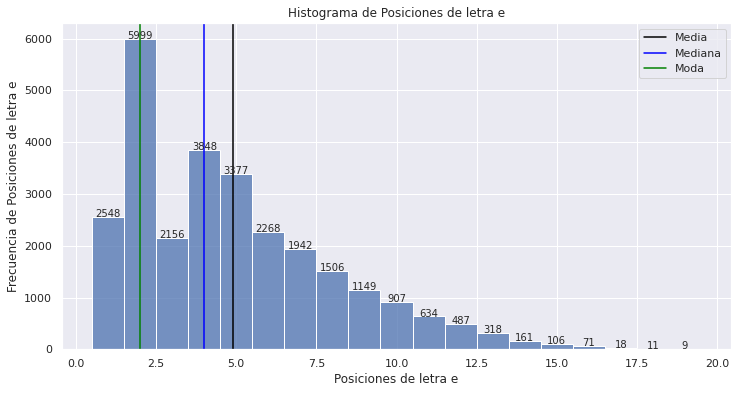

La media de Posiciones de letra e es: 4.8903870616027625 posición
La mediana de Posiciones de letra e es: 4.0 posición
La moda de Posiciones de letra e es: 2 posición


El rango de Posiciones de letra e es de: 18 [1 a 19] posiciones
La varianza de Posiciones de letra e es: 10.068522892161715 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra e es: 3.173093583895961 posiciones




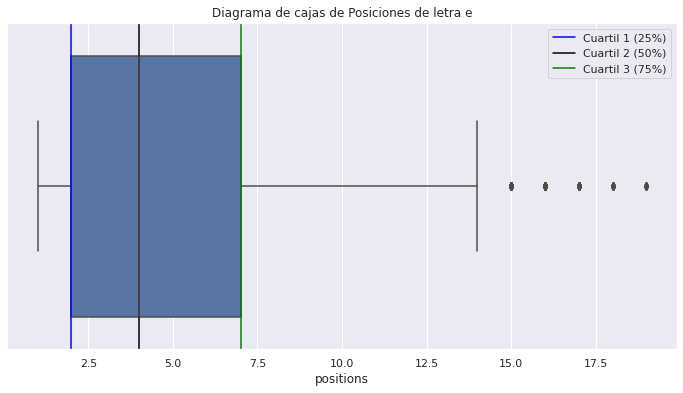

El cuartil 1 de Posiciones de letra e es: 2.0 posición
El cuartil 2 de Posiciones de letra e es: 4.0 posición
El cuartil 3 de Posiciones de letra e es: 7.0 posición




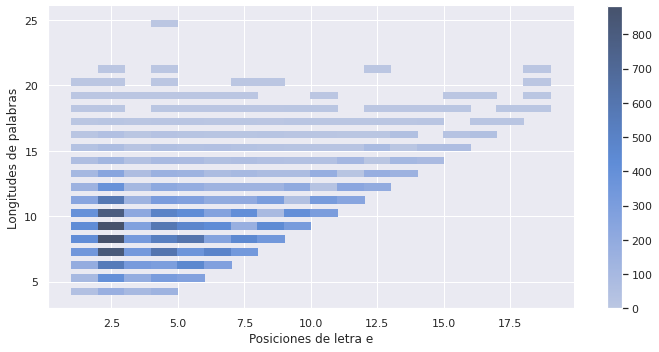

In [107]:
present_central_tendencies(pd.DataFrame(e_positions), 'positions', 'Posiciones de letra e', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(e_positions), 'positions', 'Posiciones de letra e', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(e_positions), 'positions', 'Posiciones de letra e', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(e_positions), 'Posiciones de letra e')

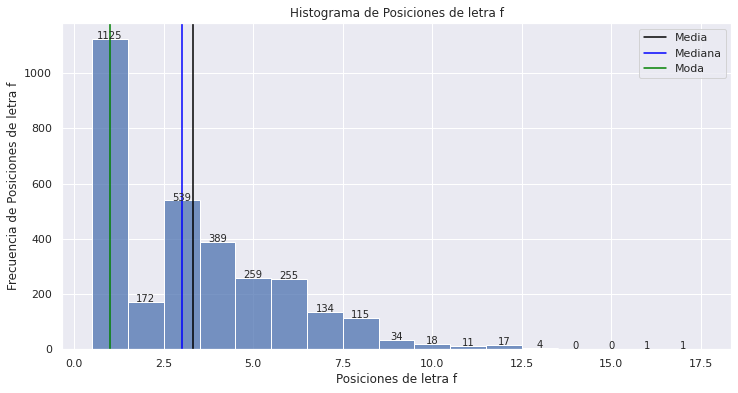

La media de Posiciones de letra f es: 3.3249837345478204 posición
La mediana de Posiciones de letra f es: 3.0 posición
La moda de Posiciones de letra f es: 1 posición


El rango de Posiciones de letra f es de: 16 [1 a 17] posiciones
La varianza de Posiciones de letra f es: 5.868035539748467 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra f es: 2.42240284423307 posiciones




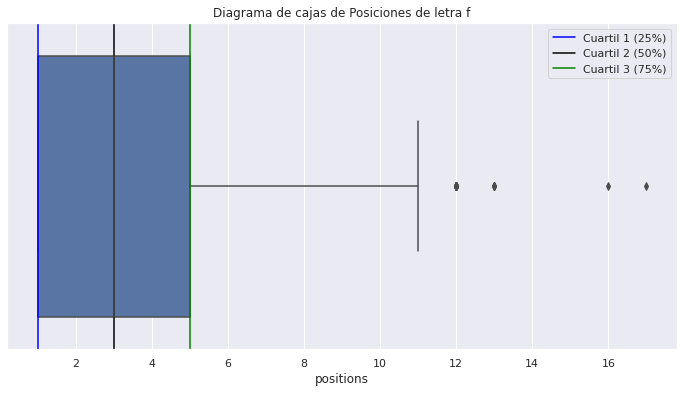

El cuartil 1 de Posiciones de letra f es: 1.0 posición
El cuartil 2 de Posiciones de letra f es: 3.0 posición
El cuartil 3 de Posiciones de letra f es: 5.0 posición




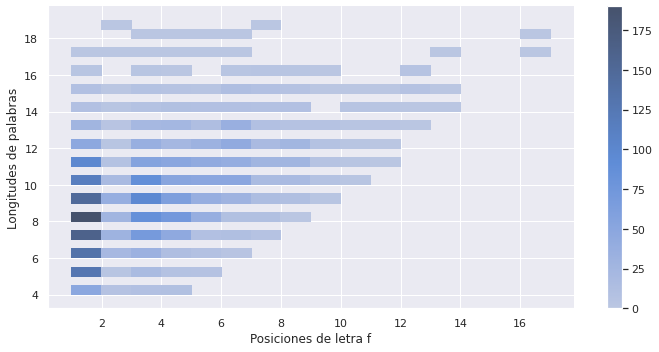

In [130]:
present_central_tendencies(pd.DataFrame(f_positions), 'positions', 'Posiciones de letra f', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(f_positions), 'positions', 'Posiciones de letra f', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(f_positions), 'positions', 'Posiciones de letra f', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(f_positions), 'Posiciones de letra f')

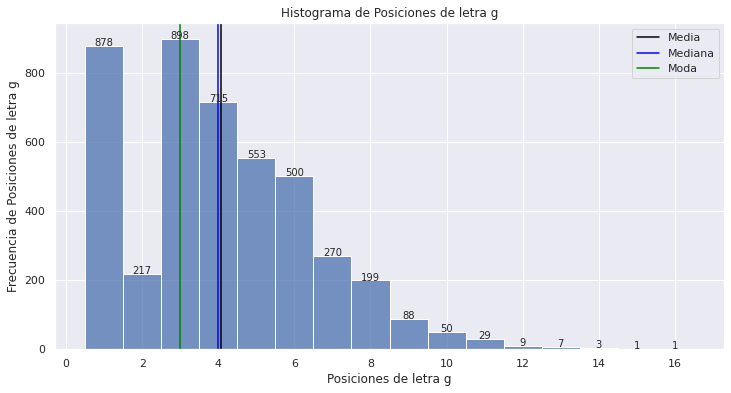

La media de Posiciones de letra g es: 4.073336351290177 posición
La mediana de Posiciones de letra g es: 4.0 posición
La moda de Posiciones de letra g es: 3 posición


El rango de Posiciones de letra g es de: 15 [1 a 16] posiciones
La varianza de Posiciones de letra g es: 5.645142377134864 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra g es: 2.375950836430515 posiciones




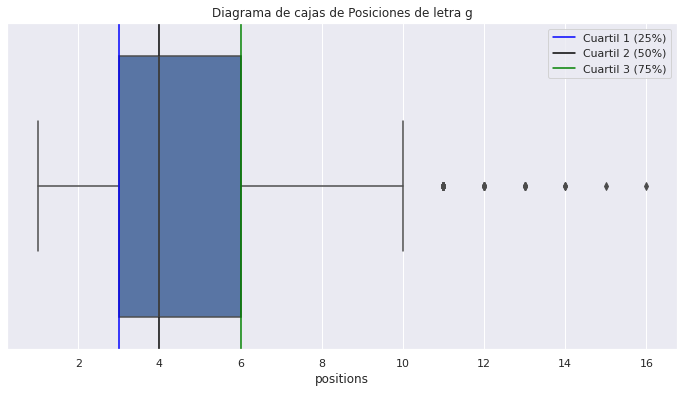

El cuartil 1 de Posiciones de letra g es: 3.0 posición
El cuartil 2 de Posiciones de letra g es: 4.0 posición
El cuartil 3 de Posiciones de letra g es: 6.0 posición




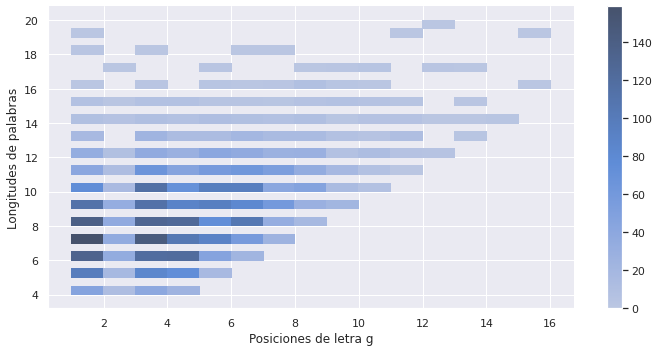

In [109]:
present_central_tendencies(pd.DataFrame(g_positions), 'positions', 'Posiciones de letra g', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(g_positions), 'positions', 'Posiciones de letra g', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(g_positions), 'positions', 'Posiciones de letra g', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(g_positions), 'Posiciones de letra g')

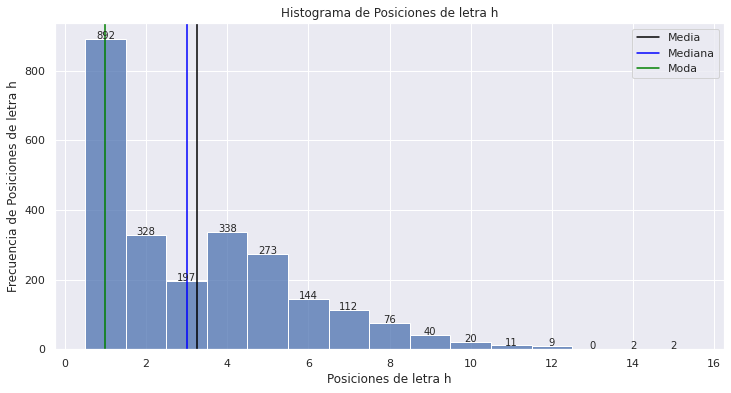

La media de Posiciones de letra h es: 3.256546644844517 posición
La mediana de Posiciones de letra h es: 3.0 posición
La moda de Posiciones de letra h es: 1 posición


El rango de Posiciones de letra h es de: 14 [1 a 15] posiciones
La varianza de Posiciones de letra h es: 5.9476862740107945 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra h es: 2.438787869826073 posiciones




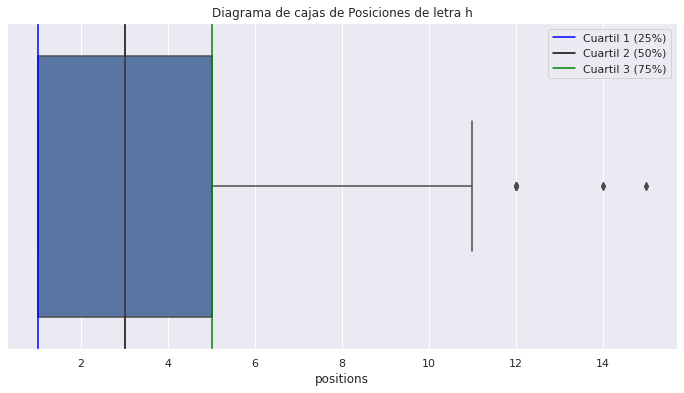

El cuartil 1 de Posiciones de letra h es: 1.0 posición
El cuartil 2 de Posiciones de letra h es: 3.0 posición
El cuartil 3 de Posiciones de letra h es: 5.0 posición




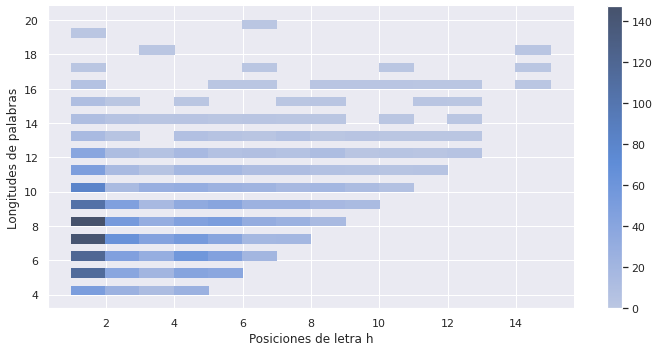

In [110]:
present_central_tendencies(pd.DataFrame(h_positions), 'positions', 'Posiciones de letra h', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(h_positions), 'positions', 'Posiciones de letra h', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(h_positions), 'positions', 'Posiciones de letra h', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(h_positions), 'Posiciones de letra h')

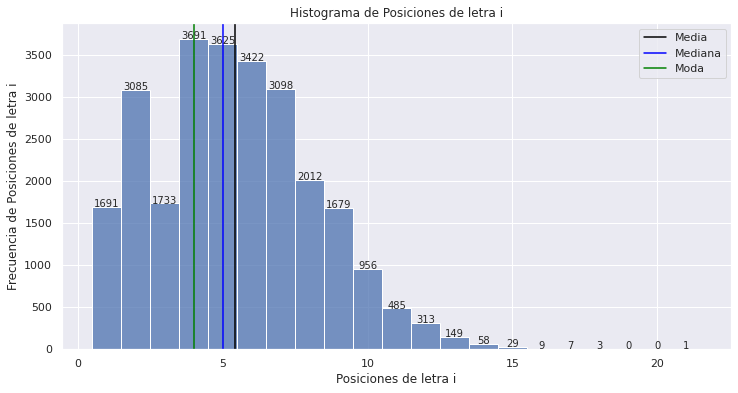

La media de Posiciones de letra i es: 5.434500499116947 posición
La mediana de Posiciones de letra i es: 5.0 posición
La moda de Posiciones de letra i es: 4 posición


El rango de Posiciones de letra i es de: 20 [1 a 21] posiciones
La varianza de Posiciones de letra i es: 7.602079315499671 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra i es: 2.757186848129751 posiciones




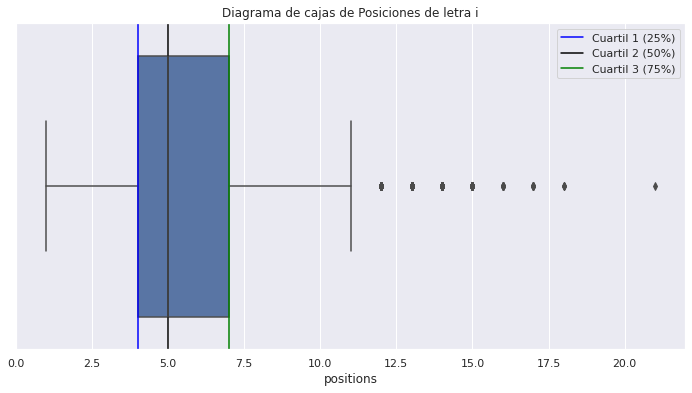

El cuartil 1 de Posiciones de letra i es: 4.0 posición
El cuartil 2 de Posiciones de letra i es: 5.0 posición
El cuartil 3 de Posiciones de letra i es: 7.0 posición




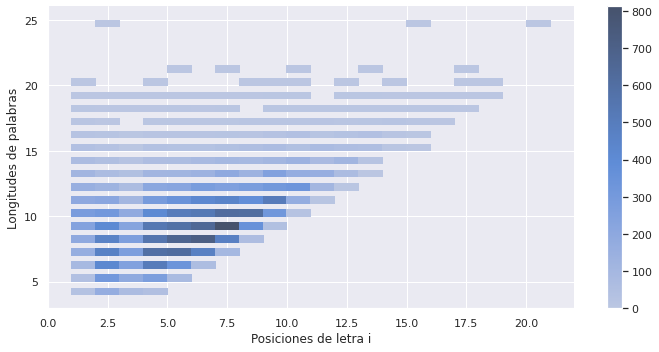

In [111]:
present_central_tendencies(pd.DataFrame(i_positions), 'positions', 'Posiciones de letra i', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(i_positions), 'positions', 'Posiciones de letra i', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(i_positions), 'positions', 'Posiciones de letra i', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(i_positions), 'Posiciones de letra i')

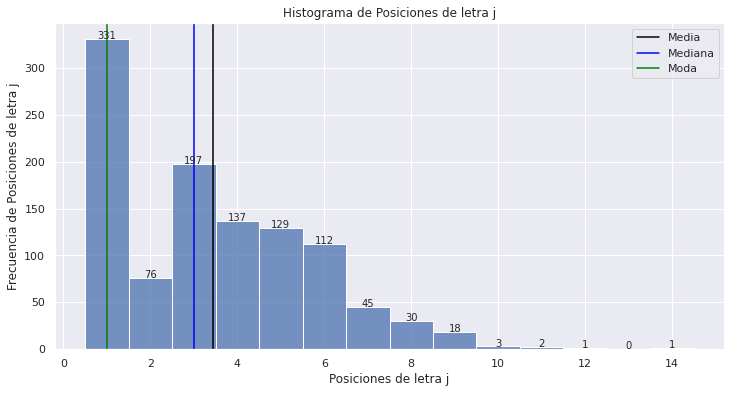

La media de Posiciones de letra j es: 3.4510166358595193 posición
La mediana de Posiciones de letra j es: 3.0 posición
La moda de Posiciones de letra j es: 1 posición


El rango de Posiciones de letra j es de: 13 [1 a 14] posiciones
La varianza de Posiciones de letra j es: 5.023940740943203 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra j es: 2.241414897100312 posiciones




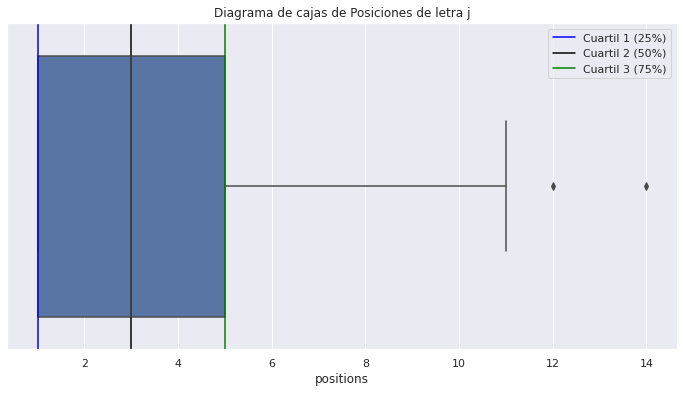

El cuartil 1 de Posiciones de letra j es: 1.0 posición
El cuartil 2 de Posiciones de letra j es: 3.0 posición
El cuartil 3 de Posiciones de letra j es: 5.0 posición




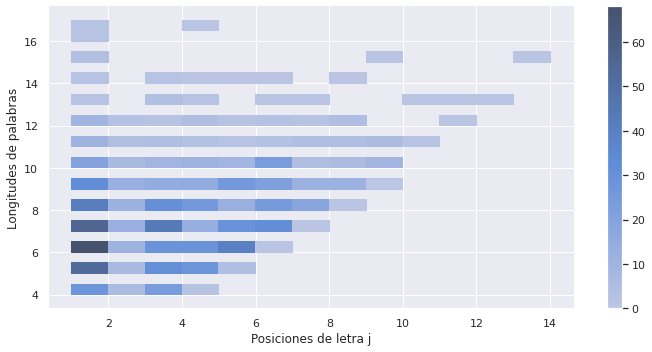

In [112]:
present_central_tendencies(pd.DataFrame(j_positions), 'positions', 'Posiciones de letra j', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(j_positions), 'positions', 'Posiciones de letra j', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(j_positions), 'positions', 'Posiciones de letra j', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(j_positions), 'Posiciones de letra j')

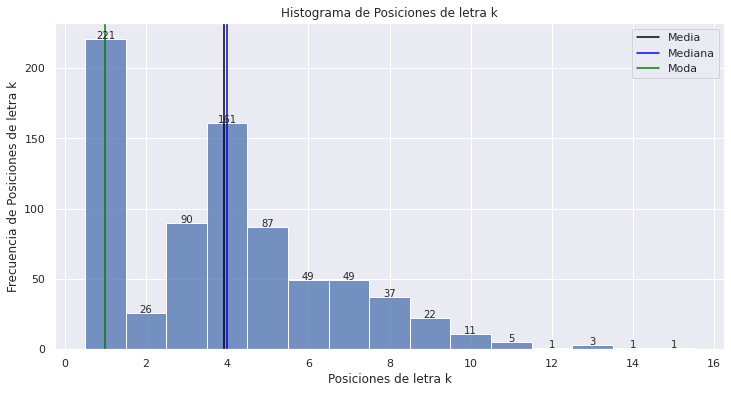

La media de Posiciones de letra k es: 3.924083769633508 posición
La mediana de Posiciones de letra k es: 4.0 posición
La moda de Posiciones de letra k es: 1 posición


El rango de Posiciones de letra k es de: 14 [1 a 15] posiciones
La varianza de Posiciones de letra k es: 6.824079657904105 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra k es: 2.61229394553984 posiciones




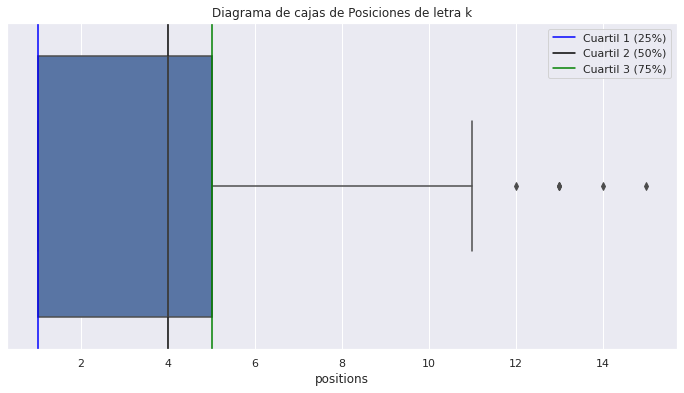

El cuartil 1 de Posiciones de letra k es: 1.0 posición
El cuartil 2 de Posiciones de letra k es: 4.0 posición
El cuartil 3 de Posiciones de letra k es: 5.0 posición




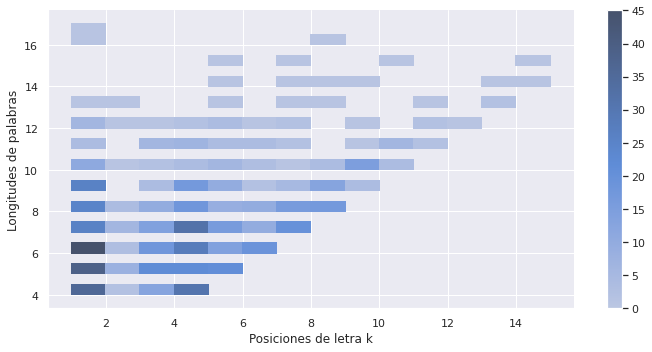

In [113]:
present_central_tendencies(pd.DataFrame(k_positions), 'positions', 'Posiciones de letra k', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(k_positions), 'positions', 'Posiciones de letra k', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(k_positions), 'positions', 'Posiciones de letra k', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(k_positions), 'Posiciones de letra k')

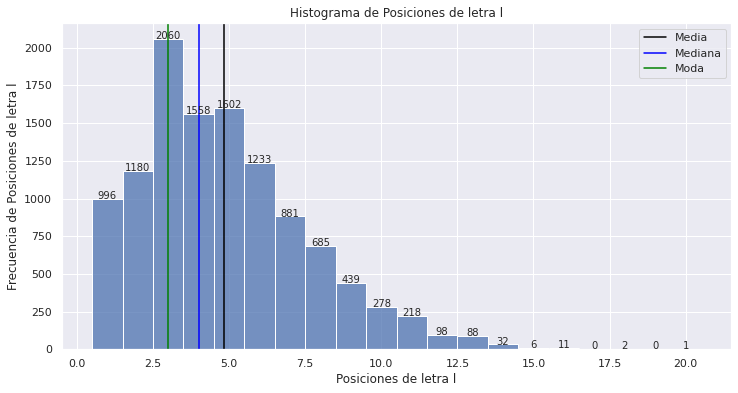

La media de Posiciones de letra l es: 4.841836734693878 posición
La mediana de Posiciones de letra l es: 4.0 posición
La moda de Posiciones de letra l es: 3 posición


El rango de Posiciones de letra l es de: 19 [1 a 20] posiciones
La varianza de Posiciones de letra l es: 7.418510067643906 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra l es: 2.7236941949572655 posiciones




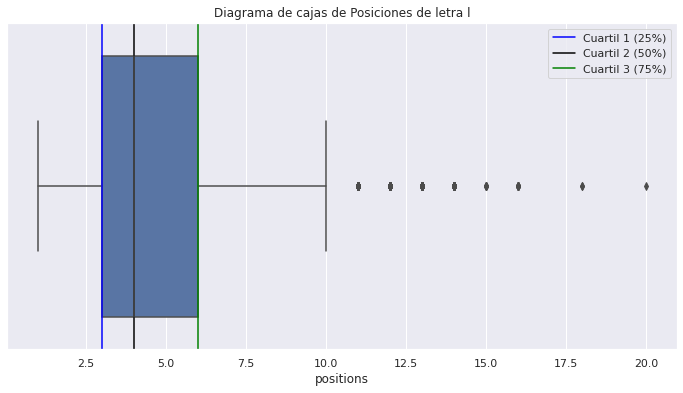

El cuartil 1 de Posiciones de letra l es: 3.0 posición
El cuartil 2 de Posiciones de letra l es: 4.0 posición
El cuartil 3 de Posiciones de letra l es: 6.0 posición




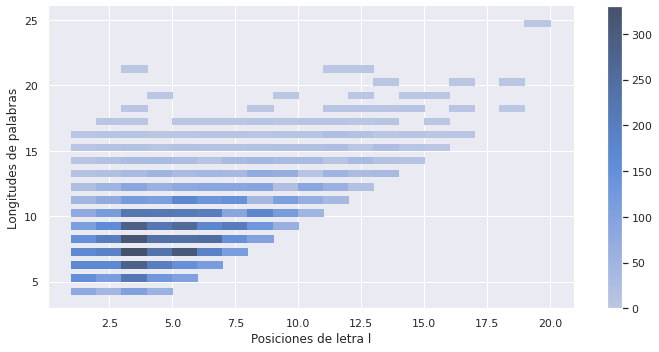

In [114]:
present_central_tendencies(pd.DataFrame(l_positions), 'positions', 'Posiciones de letra l', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(l_positions), 'positions', 'Posiciones de letra l', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(l_positions), 'positions', 'Posiciones de letra l', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(l_positions), 'Posiciones de letra l')

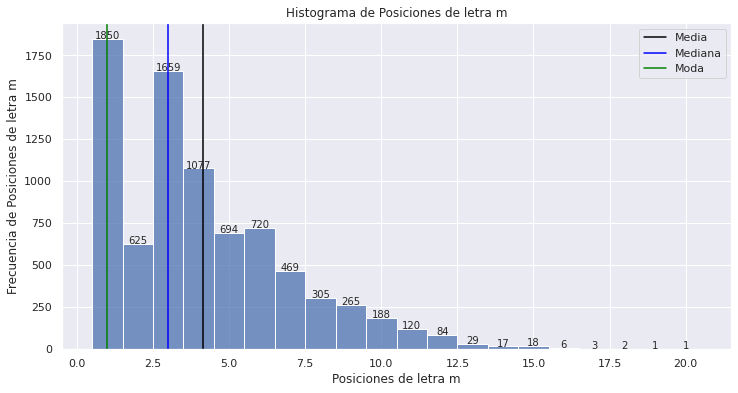

La media de Posiciones de letra m es: 4.1310709455305545 posición
La mediana de Posiciones de letra m es: 3.0 posición
La moda de Posiciones de letra m es: 1 posición


El rango de Posiciones de letra m es de: 19 [1 a 20] posiciones
La varianza de Posiciones de letra m es: 8.172172429861416 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra m es: 2.8587011788330403 posiciones




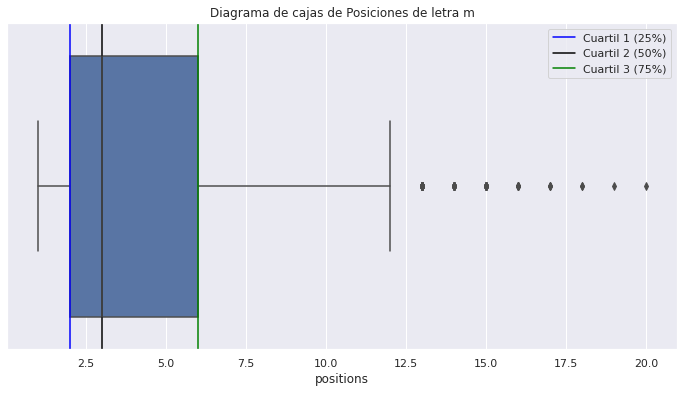

El cuartil 1 de Posiciones de letra m es: 2.0 posición
El cuartil 2 de Posiciones de letra m es: 3.0 posición
El cuartil 3 de Posiciones de letra m es: 6.0 posición




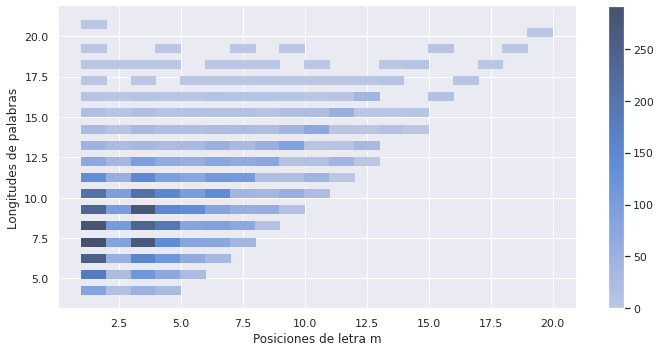

In [115]:
present_central_tendencies(pd.DataFrame(m_positions), 'positions', 'Posiciones de letra m', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(m_positions), 'positions', 'Posiciones de letra m', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(m_positions), 'positions', 'Posiciones de letra m', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(m_positions), 'Posiciones de letra m')

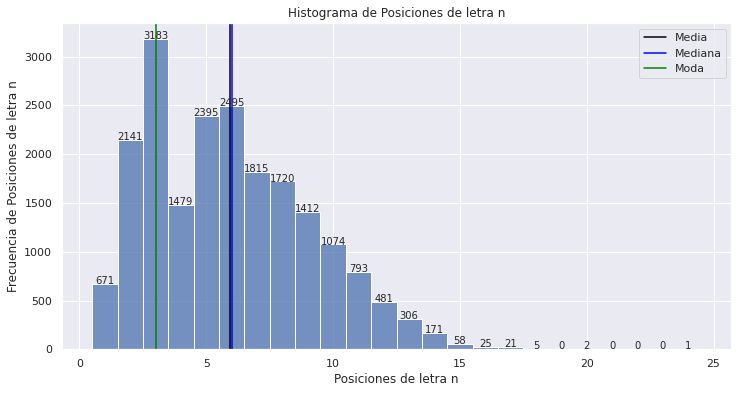

La media de Posiciones de letra n es: 5.9227578032398265 posición
La mediana de Posiciones de letra n es: 6.0 posición
La moda de Posiciones de letra n es: 3 posición


El rango de Posiciones de letra n es de: 23 [1 a 24] posiciones
La varianza de Posiciones de letra n es: 9.912544113209622 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra n es: 3.148419303906267 posiciones




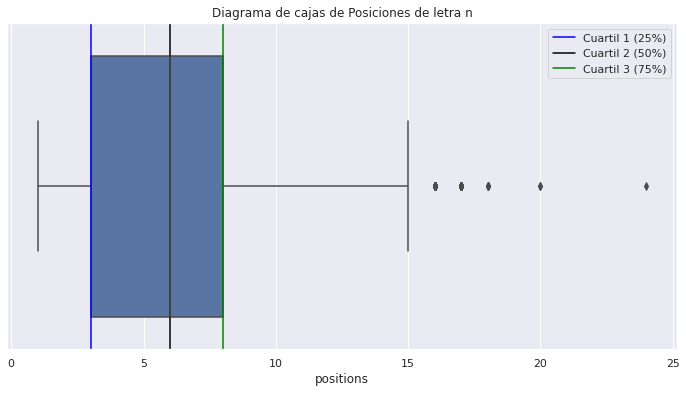

El cuartil 1 de Posiciones de letra n es: 3.0 posición
El cuartil 2 de Posiciones de letra n es: 6.0 posición
El cuartil 3 de Posiciones de letra n es: 8.0 posición




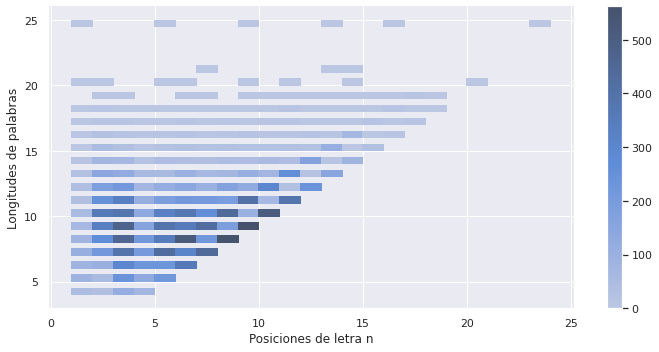

In [116]:
present_central_tendencies(pd.DataFrame(n_positions), 'positions', 'Posiciones de letra n', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(n_positions), 'positions', 'Posiciones de letra n', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(n_positions), 'positions', 'Posiciones de letra n', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(n_positions), 'Posiciones de letra n')

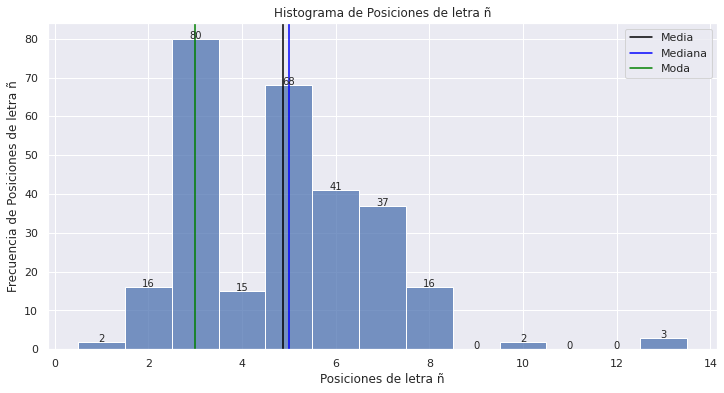

La media de Posiciones de letra ñ es: 4.878571428571429 posición
La mediana de Posiciones de letra ñ es: 5.0 posición
La moda de Posiciones de letra ñ es: 3 posición


El rango de Posiciones de letra ñ es de: 12 [1 a 13] posiciones
La varianza de Posiciones de letra ñ es: 3.8638265306122492 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra ñ es: 1.965661855613078 posiciones




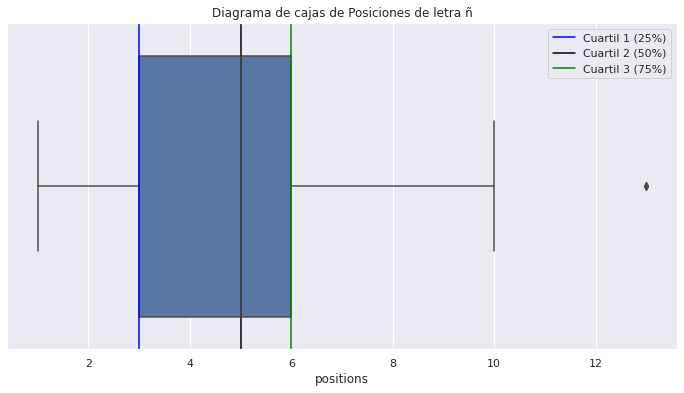

El cuartil 1 de Posiciones de letra ñ es: 3.0 posición
El cuartil 2 de Posiciones de letra ñ es: 5.0 posición
El cuartil 3 de Posiciones de letra ñ es: 6.0 posición




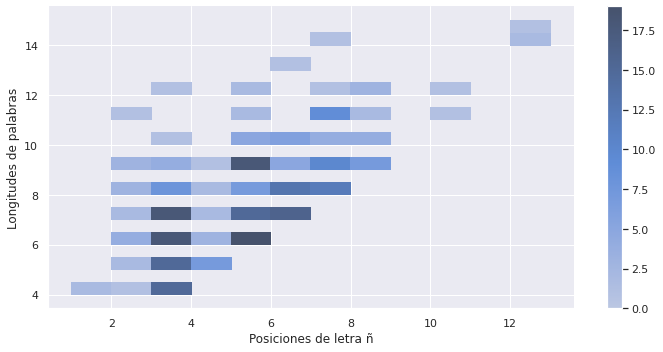

In [117]:
present_central_tendencies(pd.DataFrame(ñ_positions), 'positions', 'Posiciones de letra ñ', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(ñ_positions), 'positions', 'Posiciones de letra ñ', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(ñ_positions), 'positions', 'Posiciones de letra ñ', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(ñ_positions), 'Posiciones de letra ñ')

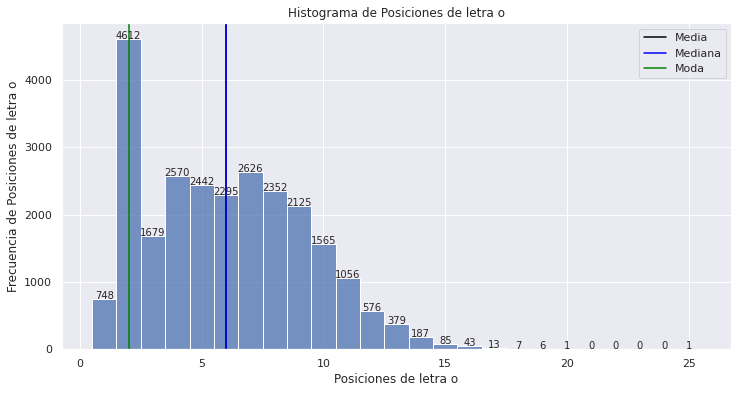

La media de Posiciones de letra o es: 5.983286029643645 posición
La mediana de Posiciones de letra o es: 6.0 posición
La moda de Posiciones de letra o es: 2 posición


El rango de Posiciones de letra o es de: 24 [1 a 25] posiciones
La varianza de Posiciones de letra o es: 10.624760062937014 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra o es: 3.259564397728171 posiciones




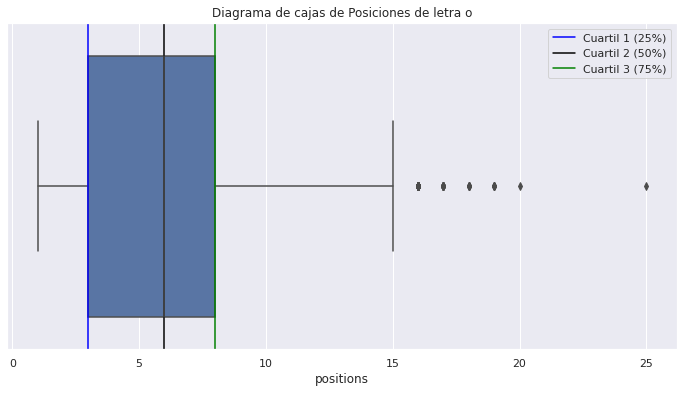

El cuartil 1 de Posiciones de letra o es: 3.0 posición
El cuartil 2 de Posiciones de letra o es: 6.0 posición
El cuartil 3 de Posiciones de letra o es: 8.0 posición




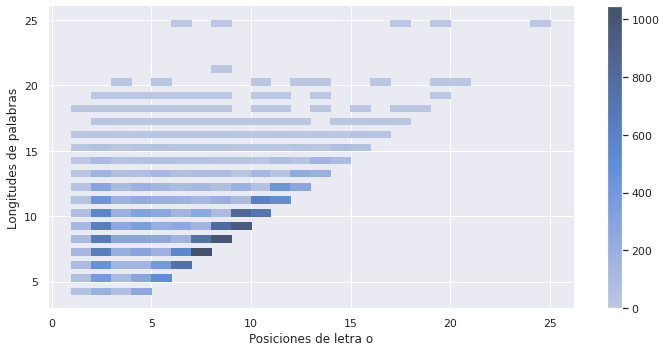

In [118]:
present_central_tendencies(pd.DataFrame(o_positions), 'positions', 'Posiciones de letra o', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(o_positions), 'positions', 'Posiciones de letra o', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(o_positions), 'positions', 'Posiciones de letra o', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(o_positions), 'Posiciones de letra o')

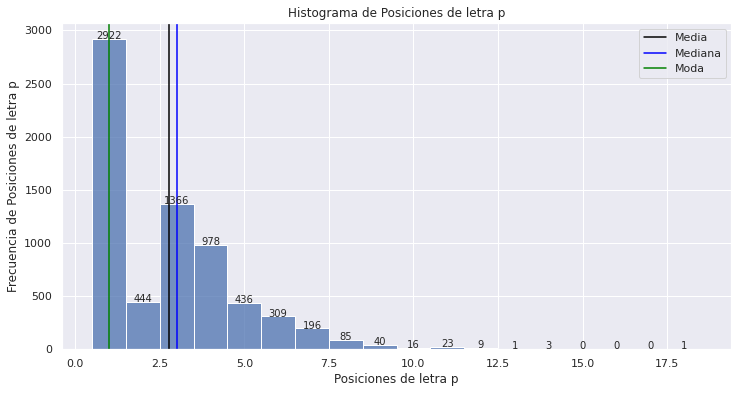

La media de Posiciones de letra p es: 2.7617513545174988 posición
La mediana de Posiciones de letra p es: 3.0 posición
La moda de Posiciones de letra p es: 1 posición


El rango de Posiciones de letra p es de: 17 [1 a 18] posiciones
La varianza de Posiciones de letra p es: 4.0447165696002845 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra p es: 2.0111480725198443 posiciones




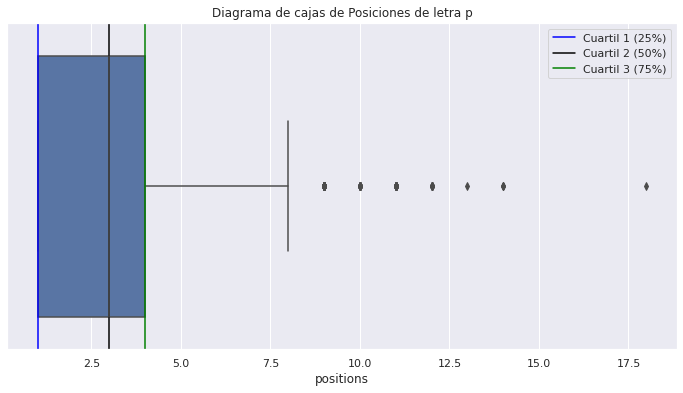

El cuartil 1 de Posiciones de letra p es: 1.0 posición
El cuartil 2 de Posiciones de letra p es: 3.0 posición
El cuartil 3 de Posiciones de letra p es: 4.0 posición




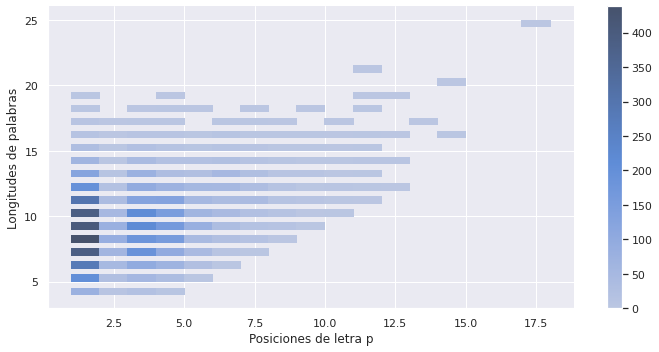

In [119]:
present_central_tendencies(pd.DataFrame(p_positions), 'positions', 'Posiciones de letra p', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(p_positions), 'positions', 'Posiciones de letra p', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(p_positions), 'positions', 'Posiciones de letra p', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(p_positions), 'Posiciones de letra p')

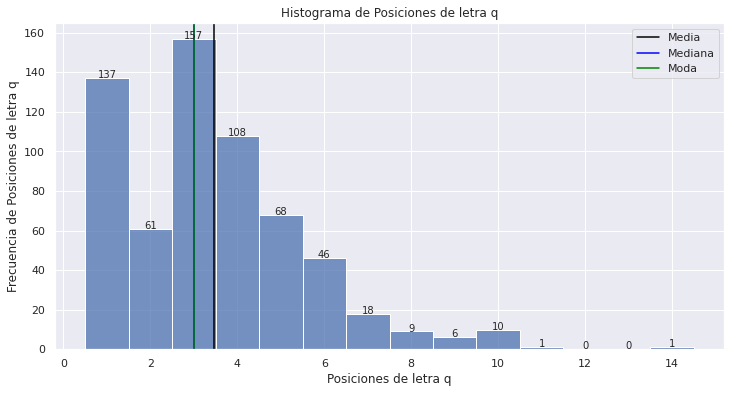

La media de Posiciones de letra q es: 3.464630225080386 posición
La mediana de Posiciones de letra q es: 3.0 posición
La moda de Posiciones de letra q es: 3 posición


El rango de Posiciones de letra q es de: 13 [1 a 14] posiciones
La varianza de Posiciones de letra q es: 4.296980490276156 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra q es: 2.072915939027957 posiciones




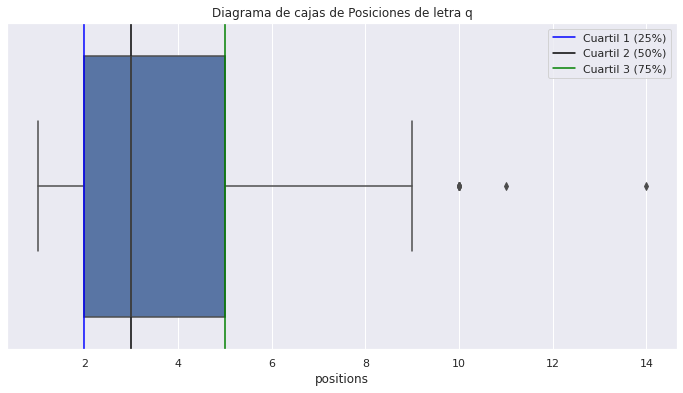

El cuartil 1 de Posiciones de letra q es: 2.0 posición
El cuartil 2 de Posiciones de letra q es: 3.0 posición
El cuartil 3 de Posiciones de letra q es: 5.0 posición




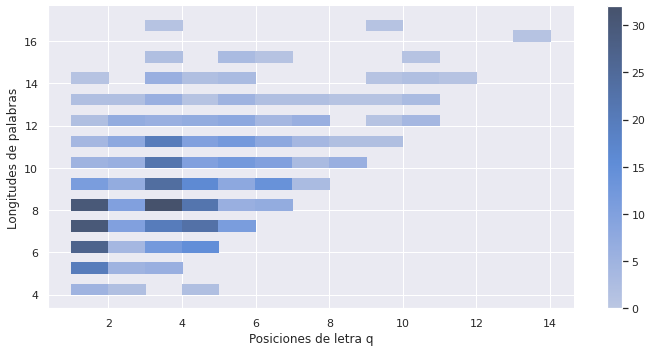

In [120]:
present_central_tendencies(pd.DataFrame(q_positions), 'positions', 'Posiciones de letra q', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(q_positions), 'positions', 'Posiciones de letra q', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(q_positions), 'positions', 'Posiciones de letra q', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(q_positions), 'Posiciones de letra q')

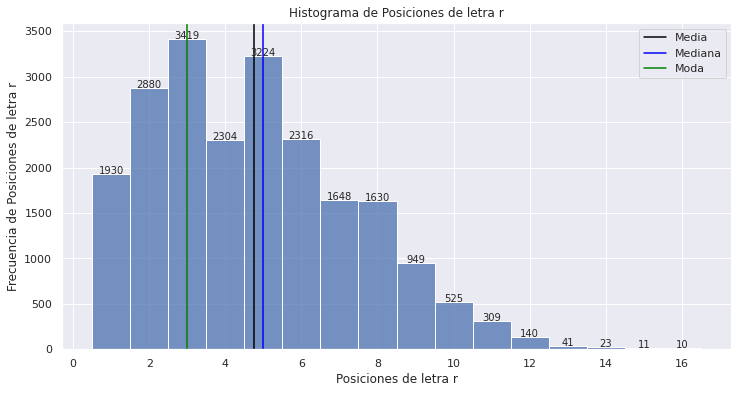

La media de Posiciones de letra r es: 4.766374830282317 posición
La mediana de Posiciones de letra r es: 5.0 posición
La moda de Posiciones de letra r es: 3 posición


El rango de Posiciones de letra r es de: 15 [1 a 16] posiciones
La varianza de Posiciones de letra r es: 6.942376066440866 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra r es: 2.634838907113842 posiciones




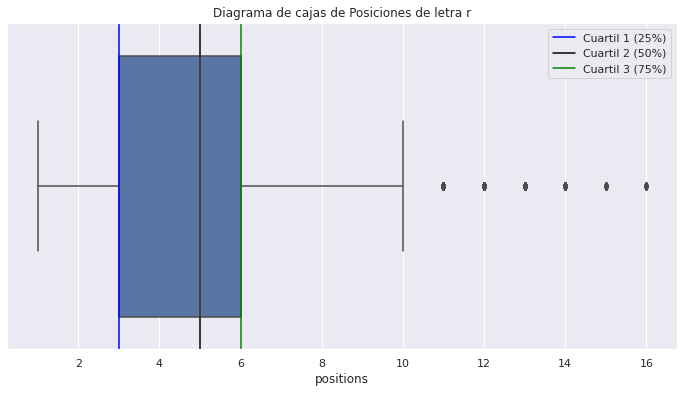

El cuartil 1 de Posiciones de letra r es: 3.0 posición
El cuartil 2 de Posiciones de letra r es: 5.0 posición
El cuartil 3 de Posiciones de letra r es: 6.0 posición




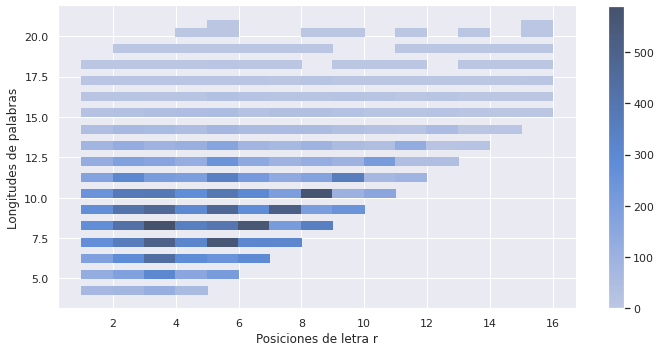

In [121]:
present_central_tendencies(pd.DataFrame(r_positions), 'positions', 'Posiciones de letra r', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(r_positions), 'positions', 'Posiciones de letra r', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(r_positions), 'positions', 'Posiciones de letra r', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(r_positions), 'Posiciones de letra r')

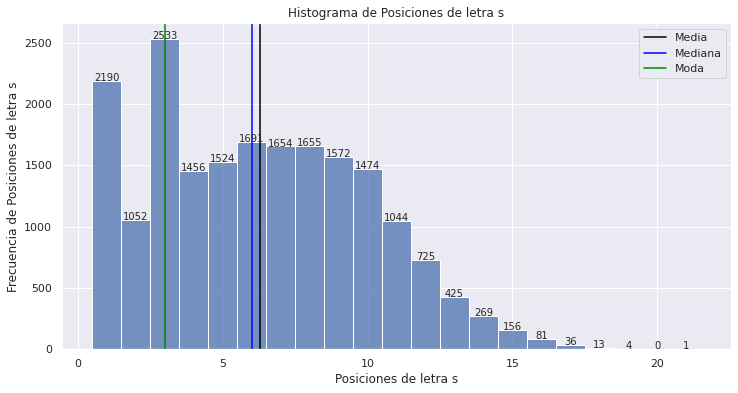

La media de Posiciones de letra s es: 6.302377908463309 posición
La mediana de Posiciones de letra s es: 6.0 posición
La moda de Posiciones de letra s es: 3 posición


El rango de Posiciones de letra s es de: 20 [1 a 21] posiciones
La varianza de Posiciones de letra s es: 13.502993578483325 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra s es: 3.6746419660265306 posiciones




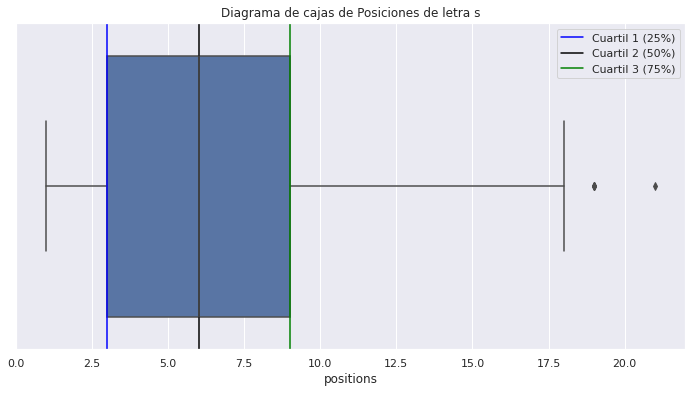

El cuartil 1 de Posiciones de letra s es: 3.0 posición
El cuartil 2 de Posiciones de letra s es: 6.0 posición
El cuartil 3 de Posiciones de letra s es: 9.0 posición




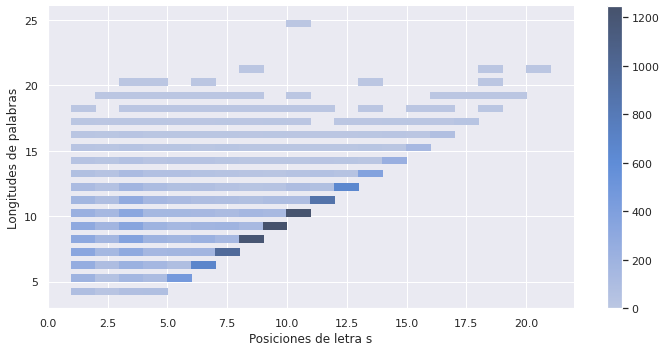

In [122]:
present_central_tendencies(pd.DataFrame(s_positions), 'positions', 'Posiciones de letra s', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(s_positions), 'positions', 'Posiciones de letra s', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(s_positions), 'positions', 'Posiciones de letra s', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(s_positions), 'Posiciones de letra s')

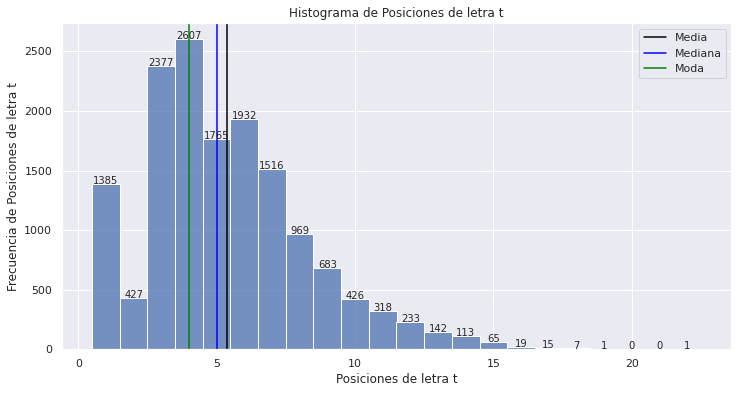

La media de Posiciones de letra t es: 5.360242650489967 posición
La mediana de Posiciones de letra t es: 5.0 posición
La moda de Posiciones de letra t es: 4 posición


El rango de Posiciones de letra t es de: 21 [1 a 22] posiciones
La varianza de Posiciones de letra t es: 8.546046844659864 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra t es: 2.9233622499888487 posiciones




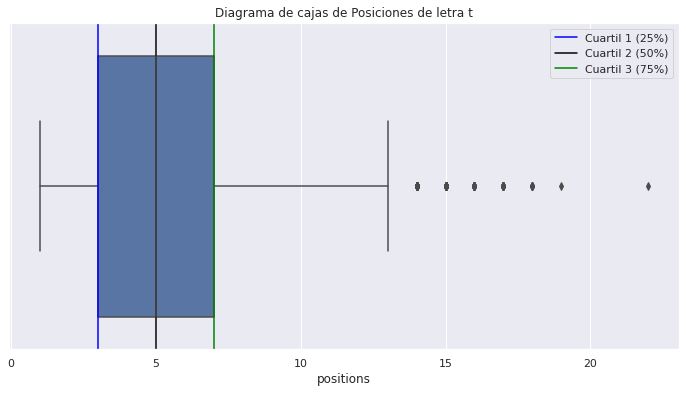

El cuartil 1 de Posiciones de letra t es: 3.0 posición
El cuartil 2 de Posiciones de letra t es: 5.0 posición
El cuartil 3 de Posiciones de letra t es: 7.0 posición




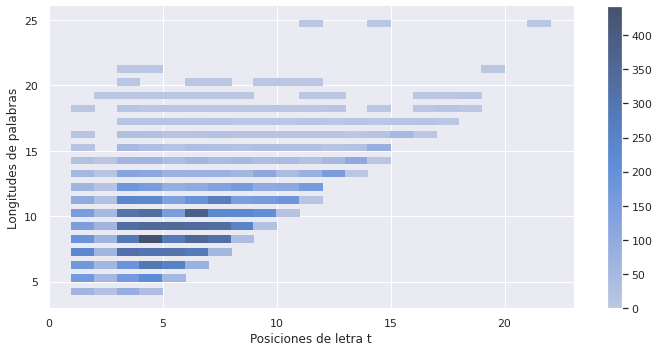

In [123]:
present_central_tendencies(pd.DataFrame(t_positions), 'positions', 'Posiciones de letra t', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(t_positions), 'positions', 'Posiciones de letra t', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(t_positions), 'positions', 'Posiciones de letra t', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(t_positions), 'Posiciones de letra t')

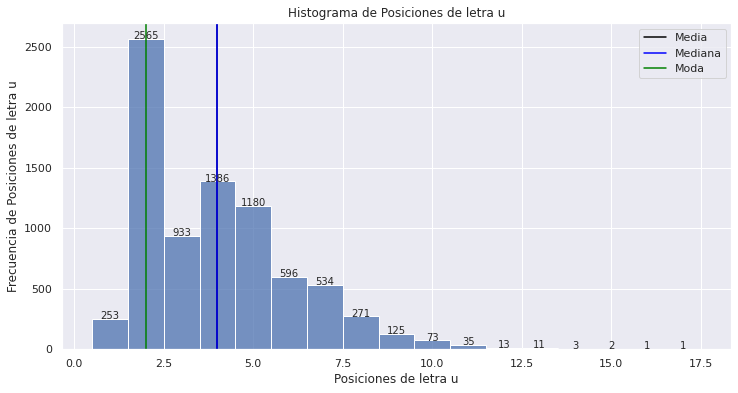

La media de Posiciones de letra u es: 3.977950388373841 posición
La mediana de Posiciones de letra u es: 4.0 posición
La moda de Posiciones de letra u es: 2 posición


El rango de Posiciones de letra u es de: 16 [1 a 17] posiciones
La varianza de Posiciones de letra u es: 4.537474225551801 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra u es: 2.1301347904655707 posiciones




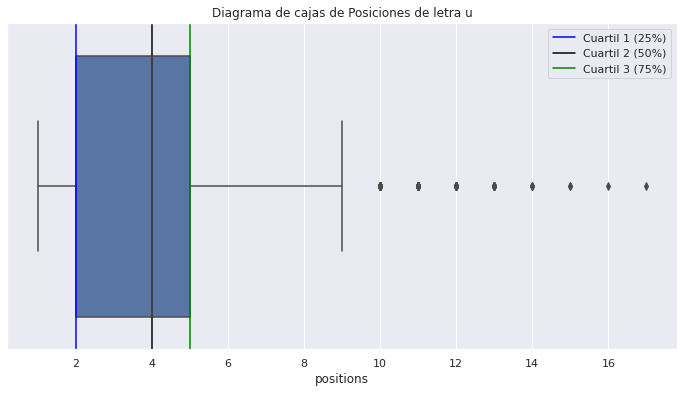

El cuartil 1 de Posiciones de letra u es: 2.0 posición
El cuartil 2 de Posiciones de letra u es: 4.0 posición
El cuartil 3 de Posiciones de letra u es: 5.0 posición




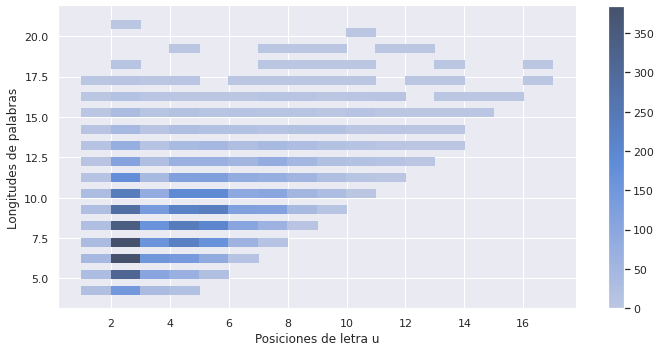

In [124]:
present_central_tendencies(pd.DataFrame(u_positions), 'positions', 'Posiciones de letra u', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(u_positions), 'positions', 'Posiciones de letra u', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(u_positions), 'positions', 'Posiciones de letra u', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(u_positions), 'Posiciones de letra u')

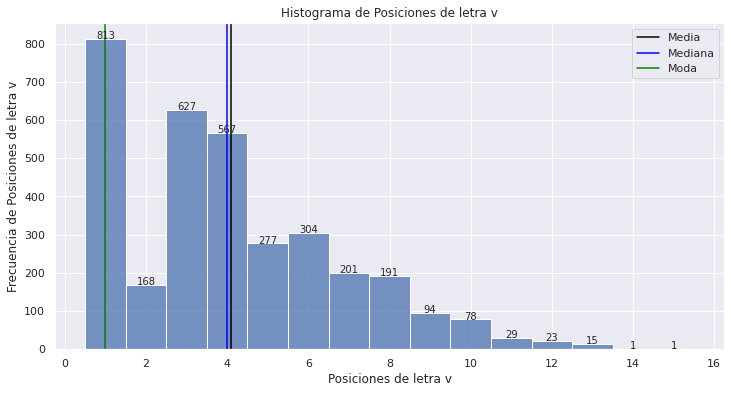

La media de Posiciones de letra v es: 4.097668928887577 posición
La mediana de Posiciones de letra v es: 4.0 posición
La moda de Posiciones de letra v es: 1 posición


El rango de Posiciones de letra v es de: 14 [1 a 15] posiciones
La varianza de Posiciones de letra v es: 7.208224132351266 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra v es: 2.6848136122180373 posiciones




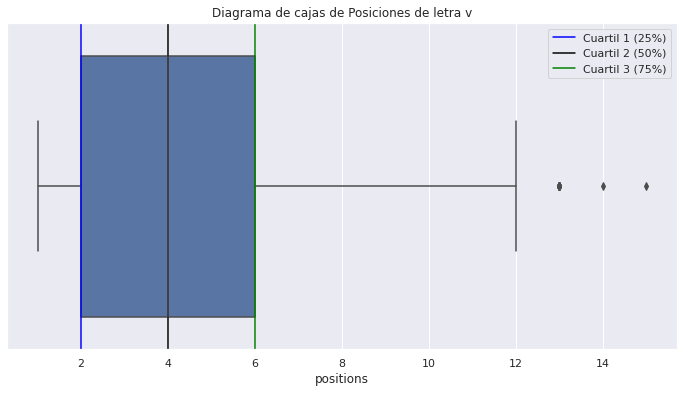

El cuartil 1 de Posiciones de letra v es: 2.0 posición
El cuartil 2 de Posiciones de letra v es: 4.0 posición
El cuartil 3 de Posiciones de letra v es: 6.0 posición




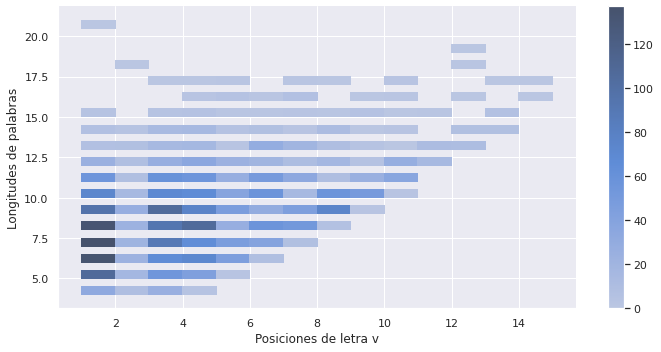

In [125]:
present_central_tendencies(pd.DataFrame(v_positions), 'positions', 'Posiciones de letra v', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(v_positions), 'positions', 'Posiciones de letra v', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(v_positions), 'positions', 'Posiciones de letra v', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(v_positions), 'Posiciones de letra v')

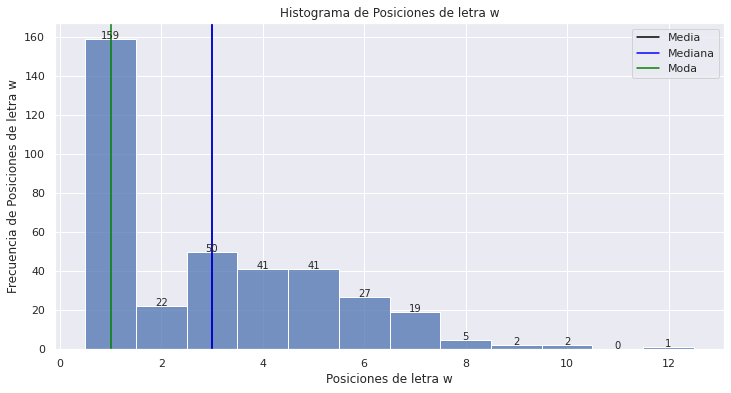

La media de Posiciones de letra w es: 3.0 posición
La mediana de Posiciones de letra w es: 3.0 posición
La moda de Posiciones de letra w es: 1 posición


El rango de Posiciones de letra w es de: 11 [1 a 12] posiciones
La varianza de Posiciones de letra w es: 4.840108401084011 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra w es: 2.200024636472058 posiciones




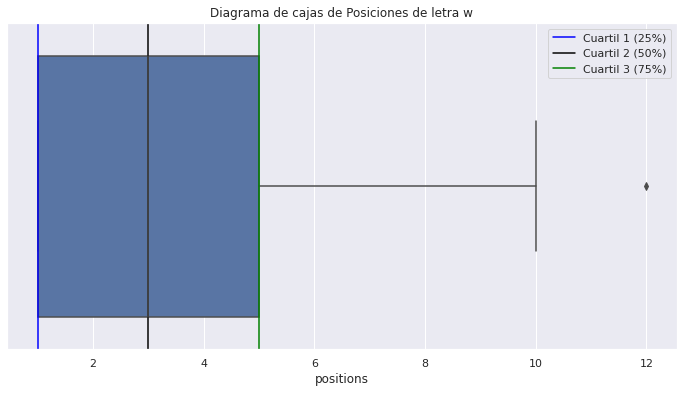

El cuartil 1 de Posiciones de letra w es: 1.0 posición
El cuartil 2 de Posiciones de letra w es: 3.0 posición
El cuartil 3 de Posiciones de letra w es: 5.0 posición




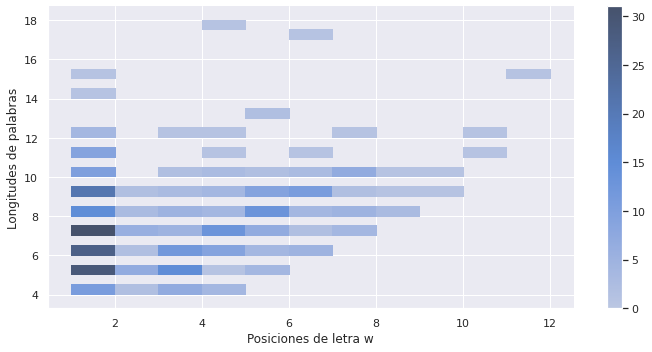

In [126]:
present_central_tendencies(pd.DataFrame(w_positions), 'positions', 'Posiciones de letra w', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(w_positions), 'positions', 'Posiciones de letra w', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(w_positions), 'positions', 'Posiciones de letra w', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(w_positions), 'Posiciones de letra w')

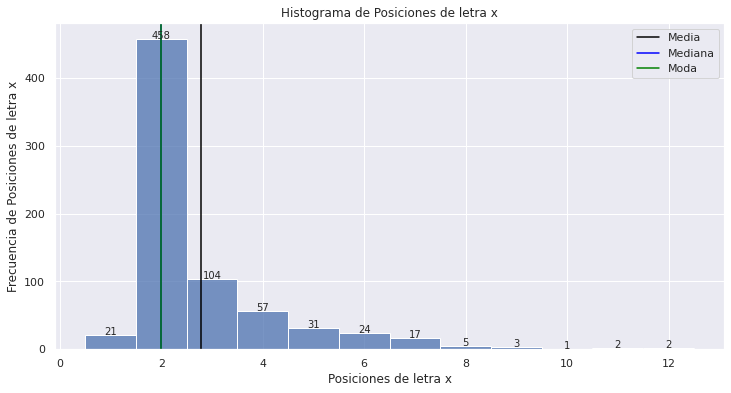

La media de Posiciones de letra x es: 2.783448275862069 posición
La mediana de Posiciones de letra x es: 2.0 posición
La moda de Posiciones de letra x es: 2 posición


El rango de Posiciones de letra x es de: 11 [1 a 12] posiciones
La varianza de Posiciones de letra x es: 2.412415695600483 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra x es: 1.5531953179173839 posiciones




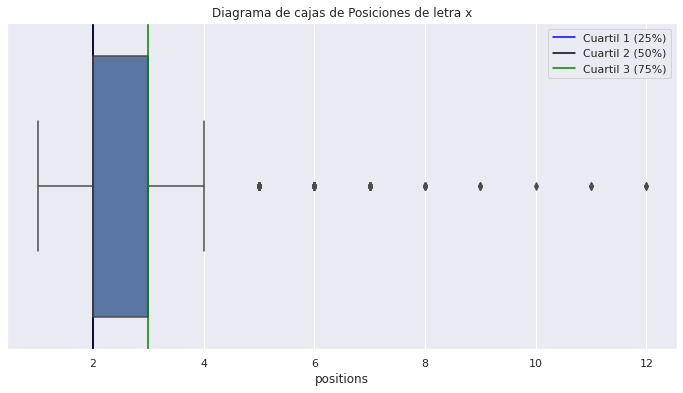

El cuartil 1 de Posiciones de letra x es: 2.0 posición
El cuartil 2 de Posiciones de letra x es: 2.0 posición
El cuartil 3 de Posiciones de letra x es: 3.0 posición




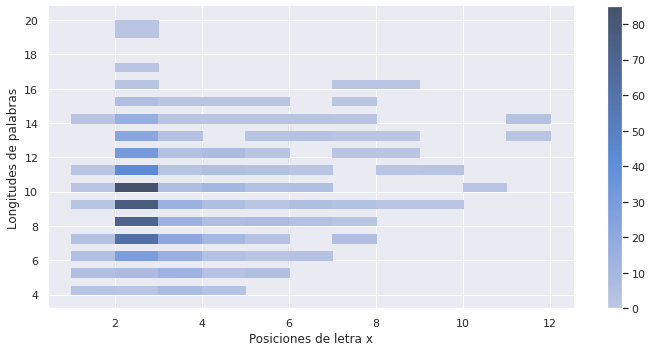

In [127]:
present_central_tendencies(pd.DataFrame(x_positions), 'positions', 'Posiciones de letra x', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(x_positions), 'positions', 'Posiciones de letra x', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(x_positions), 'positions', 'Posiciones de letra x', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(x_positions), 'Posiciones de letra x')

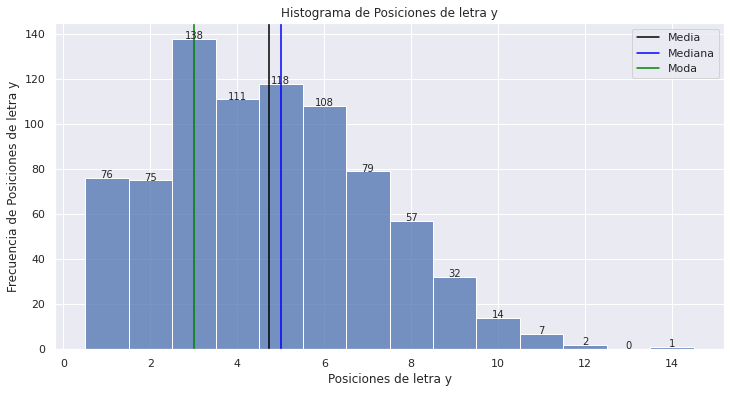

La media de Posiciones de letra y es: 4.735941320293398 posición
La mediana de Posiciones de letra y es: 5.0 posición
La moda de Posiciones de letra y es: 3 posición


El rango de Posiciones de letra y es de: 13 [1 a 14] posiciones
La varianza de Posiciones de letra y es: 5.778683771617795 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra y es: 2.4038893010323488 posiciones




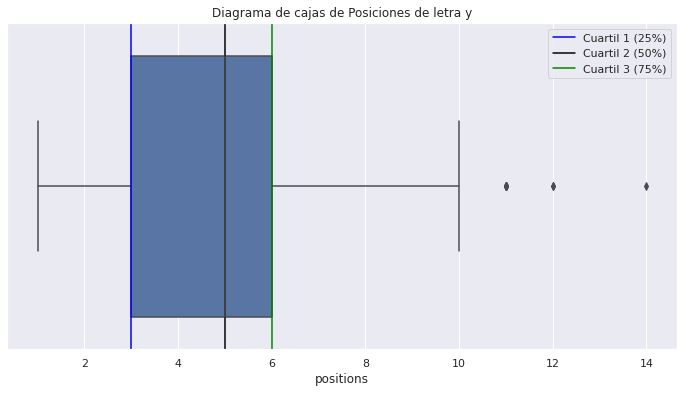

El cuartil 1 de Posiciones de letra y es: 3.0 posición
El cuartil 2 de Posiciones de letra y es: 5.0 posición
El cuartil 3 de Posiciones de letra y es: 6.0 posición




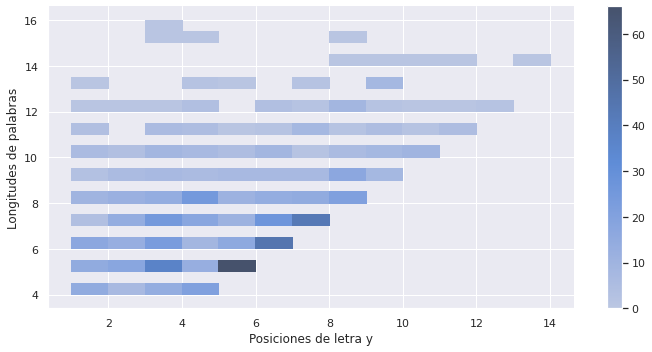

In [128]:
present_central_tendencies(pd.DataFrame(y_positions), 'positions', 'Posiciones de letra y', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(y_positions), 'positions', 'Posiciones de letra y', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(y_positions), 'positions', 'Posiciones de letra y', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(y_positions), 'Posiciones de letra y')

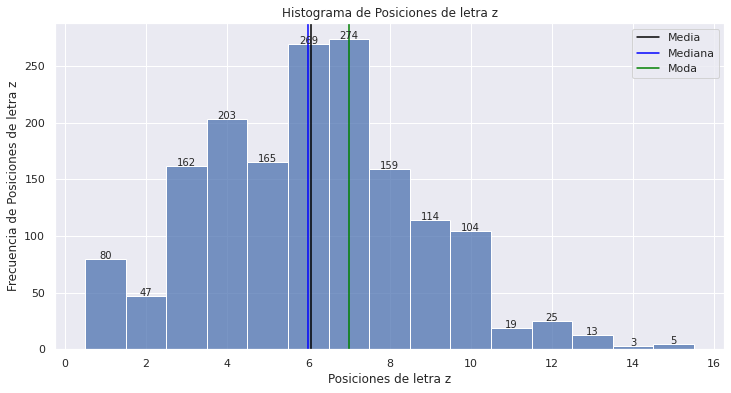

La media de Posiciones de letra z es: 6.066991473812424 posición
La mediana de Posiciones de letra z es: 6.0 posición
La moda de Posiciones de letra z es: 7 posición


El rango de Posiciones de letra z es de: 14 [1 a 15] posiciones
La varianza de Posiciones de letra z es: 6.93582882940355 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra z es: 2.6335961781191037 posiciones




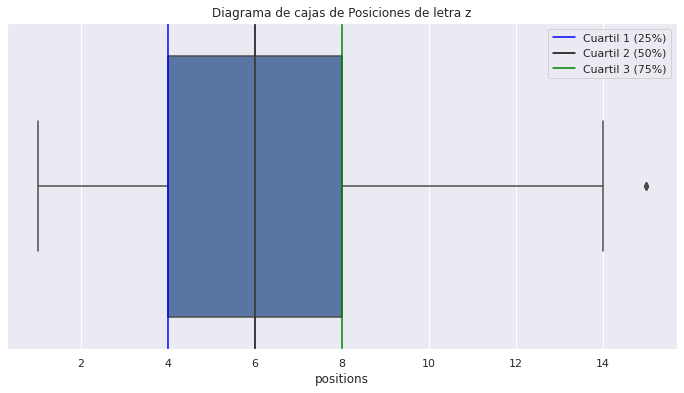

El cuartil 1 de Posiciones de letra z es: 4.0 posición
El cuartil 2 de Posiciones de letra z es: 6.0 posición
El cuartil 3 de Posiciones de letra z es: 8.0 posición




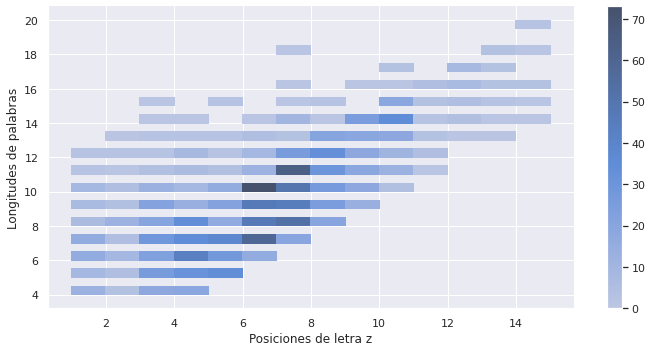

In [129]:
present_central_tendencies(pd.DataFrame(z_positions), 'positions', 'Posiciones de letra z', 'posición')
print("\n")
present_dispersion_stats(pd.DataFrame(z_positions), 'positions', 'Posiciones de letra z', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(z_positions), 'positions', 'Posiciones de letra z', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(z_positions), 'Posiciones de letra z')